In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

In [2]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree


from wordcloud import WordCloud
from PIL import Image

In [3]:
df = pd.read_csv('SG-airbnb_Cleaned.csv')
df.head()

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,shared_bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms
0,50646,https://www.airbnb.com/rooms/50646,2021-09-29,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",within an hour,100.0,71.579047,0,https://a0.muscache.com/im/pictures/user/8fd2c...,https://a0.muscache.com/im/pictures/user/8fd2c...,Bukit Timah,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,Bukit Timah,Central Region,1.33432,103.78521,Private room in rental unit,Private room,2,0,1.0,1.0,"[""Pool"", ""Essentials"", ""Cable TV"", ""Wifi"", ""Lo...",80.0,90,730,1,29,59,89,364,18,0,0,2014-10-14,2014-07-08,4.56,4.72,4.78,4.78,4.94,4.72,4.50,0,1,0,1,0,0.21,1.0
1,71609,https://www.airbnb.com/rooms/71609,2021-09-29,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,within an hour,100.0,71.579047,0,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,8.0,"['email', 'phone', 'reviews', 'manual_offline'...",1,1,Tampines,East Region,1.34537,103.95887,Private room in villa,Private room,6,0,2.0,3.0,"[""Essentials"", ""Hair dryer"", ""Iron"", ""Hot tub""...",178.0,90,1125,1,30,60,90,365,20,0,0,2015-10-05,2019-12-28,4.44,4.37,4.00,4.63,4.78,4.26,4.32,0,4,0,4,0,0.27,1.0
2,71896,https://www.airbnb.com/rooms/71896,2021-09-29,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,within an hour,100.0,71.579047,0,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,8.0,"['email', 'phone', 'reviews', 'manual_offline'...",1,1,Tampines,East Region,1.34754,103.95958,Private room in residential home,Private room,3,0,1.0,1.0,"[""Essentials"", ""Hair dryer"", ""Coffee maker"", ""...",81.0,90,1125,1,30,60,90,365,24,0,0,2015-08-14,2014-12-10,4.16,4.22,4.09,4.43,4.43,4.17,4.04,0,4,0,4,0,0.32,1.0
3,71903,https://www.airbnb.com/rooms/71903,2021-09-29,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,https://www.airbnb.com/users/show/367042,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,within an hour,100.0,71.579047,0,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil..

In [4]:
df_describe =[]

for i in df.columns: 
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])
    
desc = pd.DataFrame(df_describe, columns=['column', 'Data Type', 'Nan', 'Nan(%)', 'Nunique', 'Sample'])
desc

,column,Data Type,Nan,Nan(%),Nunique,Sample
0,id,int64,0,0.00,4213,"[50646, 71609, 71896, 71903, 275343, 275344, 2..."
1,listing_url,object,0,0.00,4213,"[https://www.airbnb.com/rooms/50646, https://w..."
2,last_scraped,object,0,0.00,1,[2021-09-29]
3,name,object,0,0.00,3897,"[Pleasant Room along Bukit Timah, Ensuite Room..."
4,description,object,137,3.25,3147,[Fully furnished bedroom with a nice view on t...
5,neighborhood_overview,object,1451,34.44,1301,[The serenity & quiet surrounding makes it an ...
6,picture_url,object,0,0.00,3877,[https://a0.muscache.com/pictures/36342984/670...
7,host_id,int64,0,0.00,1126,"[227796, 367042, 1439258, 1490000, 1521514, 15..."
8,host_url,object,0,0.00,1126,"[https://www.airbnb.com/users/show/227796, htt..."
9,host_name,object,0,0.00,865,"[Sujatha, Belinda, Joyce, B., Elizabeth, Rahul..."


# EDA

## Date

In [5]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_scraped'] = pd.to_datetime(df['last_scraped'])

df['host_duration'] = df['last_scraped']-df['host_since']
df['host_duration'] = df['host_duration'].dt.days
df[['host_since','first_review', 'last_review', 'host_duration']].sort_values(by='host_since')

,host_since,first_review,last_review,host_duration
1967,2009-06-29,2019-07-14,2020-02-11,4475
1997,2009-06-29,2019-01-25,2019-01-25,4475
0,2010-09-08,2014-10-14,2014-07-08,4039
278,2011-01-11,2017-02-09,2017-01-10,3914
3,2011-01-29,2015-08-16,2019-10-21,3896
...,...,...,...,...
4128,2021-08-14,NaT,NaT,46
4179,2021-08-20,2021-09-16,2021-09-23,40
4154,2021-08-27,2021-09-15,2021-09-15,33
4184,2021-09-14,NaT,NaT,15


## Host

In [6]:
host = ['host_name','host_since','host_location','host_about','host_response_time','host_response_rate',
        'host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url',
        'host_neighbourhood','host_total_listings_count','host_verifications',
        'host_has_profile_pic','host_identity_verified',
        'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms', 'host_duration']
df[host].head()

,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration
0,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",within an hour,100.0,71.579047,0,https://a0.muscache.com/im/pictures/user/8fd2c...,https://a0.muscache.com/im/pictures/user/8fd2c...,Bukit Timah,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",1,1,1,0,1,0,4039
1,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,within an hour,100.0,71.579047,0,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,8.0,"['email', 'phone', 'reviews', 'manual_offline'...",1,1,4,0,4,0,3896
2,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,within an hour,100.0,71.579047,0,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,8.0,"['email', 'phone', 'reviews', 'manual_offline'...",1,1,4,0,4,0,3896
3,Belinda,2011-01-29,Singapore,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,within an hour,100.0,71.579047,0,https://a0.muscache.com/im/users/367042/profil...,https://a0.muscache.com/im/users/367042/profil...,Tampines,8.0,"['email', 'phone', 'reviews', 'manual_offline'...",1,1,4,0,4,0,3896
4,Joyce,2011-11-24,"Singapore, Singapore",K2 Guesthouse is designed for guests who want ...,within a few hours,81.0,100.000000,0,https://a0.muscache.com/im/pictures/user/dad35...,https://a0.muscache.com/im/pictures/user/dad35...,Bukit Merah,50.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,50,1,49,0,3597


In [7]:
print(len(df['host_id'].unique()))

1126


In [8]:
color= '#17869E'
color2 = '#EA8E83'

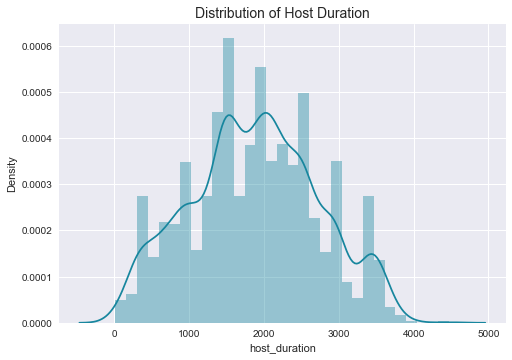

In [9]:
sns.distplot(df['host_duration'], kde=True,color=color)
plt.title('Distribution of Host Duration', size=14)
plt.show()

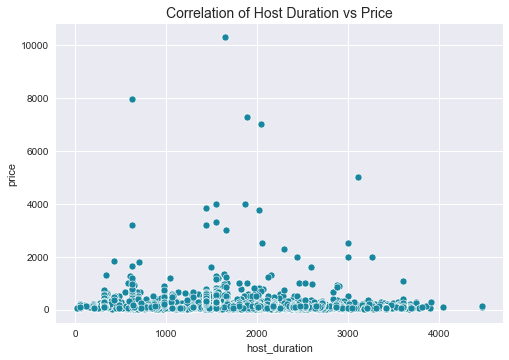

In [10]:
sns.scatterplot(x='host_duration', y='price', data=df, color=color)
plt.title('Correlation of Host Duration vs Price', size=14)
plt.show()

In [11]:
host2 = ['host_is_superhost',
        'host_neighbourhood','host_total_listings_count',
        'host_has_profile_pic','host_identity_verified',
        'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']

for i in host2:
    print(i.upper())
    print(df[i].value_counts(),'\n')

HOST_IS_SUPERHOST
0    3530
1     683
Name: host_is_superhost, dtype: int64 

HOST_NEIGHBOURHOOD
Kallang               903
Chinatown             468
Geylang               299
Bugis/Kampong Glam    233
Central Area          206
Bukit Merah           199
Queenstown            193
Fortress Hill         188
Marine Parade         167
Novena                155
Downtown Core          82
Katong                 78
Clementi               75
Marina Bay             73
Bedok                  66
Arab Street            58
Outram                 56
Rochor                 53
Tanglin                44
Riverside              44
Bukit Timah            43
Jurong West            40
Woodlands              38
Little India           37
Bukit Batok            35
Tampines               29
Serangoon              28
Bishan                 28
Hougang                28
Jurong East            28
Pasir Ris              25
Singapore River        24
Orchard                23
Ang Mo Kio             23
Sembawang          

# Price

In [12]:
df['price'].describe()

count     4212.000000
mean       170.139601
std        345.558595
min         13.000000
25%         64.000000
50%        110.000000
75%        180.000000
max      10286.000000
Name: price, dtype: float64

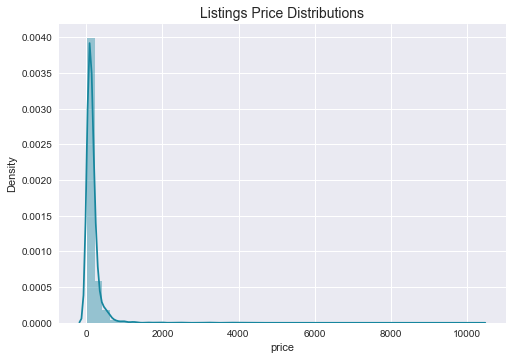

In [13]:
sns.distplot(df['price'], color=color)
plt.title('Listings Price Distributions', size=14)
plt.show()

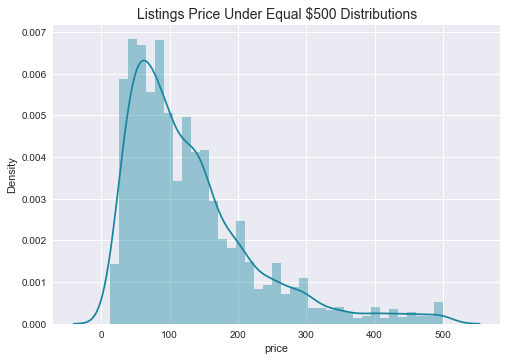

In [14]:
sns.distplot(df[df['price'] <= 500]['price'], color=color)
plt.title('Listings Price Under Equal $500 Distributions', size=14)
plt.show()

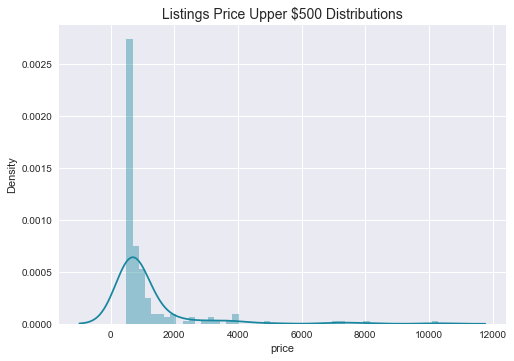

In [15]:
sns.distplot(df[df['price'] > 500]['price'], color=color)
plt.title('Listings Price Upper $500 Distributions', size=14)
plt.show()

In [16]:
print(len(df[df['price'] <= 500]['price']))
print(len(df[df['price'] > 500]['price']))

4048
164


> #### Analysis
- Ketiga chart diatas menunjukan distribusi harga sewa listing di Airbnb Singapore
- Dari 4213 listings yang ada, terdapat 164 listings yang memiliki harga sangat tinggi mulai dari 500 dollar hingga mencapai 10000 dollar
- Kita akan memfokuskan analisis kita hanya untuk listings yang range harga sewanya dibawah 500 dollar

In [17]:
df_counters = df[['id','listing_url','latitude','longitude']][df['price']>500]
df[['id','listing_url','latitude','longitude','price']][df['price']>500].head(10)

,id,listing_url,latitude,longitude,price
82,2142826,https://www.airbnb.com/rooms/2142826,1.32485,103.85143,929.0
95,3022590,https://www.airbnb.com/rooms/3022590,1.35657,103.86665,1982.0
121,4013186,https://www.airbnb.com/rooms/4013186,1.27795,103.84109,950.0
173,4978175,https://www.airbnb.com/rooms/4978175,1.33203,103.94396,1000.0
213,5774164,https://www.airbnb.com/rooms/5774164,1.31315,103.88100,1600.0
276,6837947,https://www.airbnb.com/rooms/6837947,1.38084,103.88983,2300.0
323,7769781,https://www.airbnb.com/rooms/7769781,1.27311,103.84078,581.0
521,11170452,https://www.airbnb.com/rooms/11170452,1.32258,103.86423,2500.0
522,11220676,https://www.airbnb.com/rooms/11220676,1.30081,103.83598,784.0
534,11544732,https://www.airbnb.com/rooms/11544732,1.28348,103.84135,7000.0


In [18]:
locations = df[['latitude','longitude']][df['price']>500]
locationlist = locations.values.tolist()

In [19]:
df_counters.reset_index(drop =True, inplace = True)
locations.mean().tolist()

[1.3015891463414628, 103.84183756097556]

In [20]:
map = folium.Map(location=locations.mean().tolist(), zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_counters['listing_url'][point]).add_to(map)
map

> - Map diatas adalah titik-titik dimana listings dengan harga sewa diatas 500 dollar berada
> - Listings dengan harga sewa lebih dari 500 dollar, banyaknya tersebar di Central Region Singapore

In [21]:
df[df['price'] > 500][['neighbourhood_group_cleansed','name','property_type','price']].head(25)

,neighbourhood_group_cleansed,name,property_type,price
82,Central Region,Singapore Room for Rent!,Private room in rental unit,929.0
95,North-East Region,Modern Asian Designer Terrace in Central Singa...,Entire residential home,1982.0
121,Central Region,Cosy Room right in the City town.,Private room in rental unit,950.0
173,East Region,Cat Lovers: Quaint Vintage House,Private room in residential home,1000.0
213,Central Region,Entire Apartment -Terrace Pool Gym,Entire rental unit,1600.0
276,North-East Region,Flat for Rent,Entire rental unit,2300.0
323,Central Region,Large Room- CBD Next to KALPSON AMARA & SOUTHP...,Private room in residential home,581.0
521,Central Region,2 Bedroom apt 5mins Boon Keng MRT,Entire rental unit,2500.0
522,Central Region,LUXURY CONDO IN SINGAPORE,Entire condominium (condo),784.0
534,Central Region,P,Private room in rental unit,7000.0


# Location

In [22]:
location = ['neighbourhood_group_cleansed','neighbourhood_cleansed','latitude','longitude']

In [23]:
df[location]

,neighbourhood_group_cleansed,neighbourhood_cleansed,latitude,longitude
0,Central Region,Bukit Timah,1.334320,103.785210
1,East Region,Tampines,1.345370,103.958870
2,East Region,Tampines,1.347540,103.959580
3,East Region,Tampines,1.345310,103.961000
4,Central Region,Bukit Merah,1.290150,103.808140
...,...,...,...,...
4208,Central Region,Singapore River,1.287974,103.847683
4209,Central Region,Bukit Merah,1.283378,103.831395
4210,Central Region,Marine Parade,1.304366,103.900947
4211,North Region,Central Water Catchment,1.351350,103.818822


In [24]:
for i in location:
    print(i.upper())
    print(df[i].value_counts(),'\n')

NEIGHBOURHOOD_GROUP_CLEANSED
Central Region       3379
West Region           290
East Region           267
North-East Region     148
North Region          129
Name: neighbourhood_group_cleansed, dtype: int64 

NEIGHBOURHOOD_CLEANSED
Kallang                    543
Outram                     390
Geylang                    384
Rochor                     320
Downtown Core              316
Novena                     234
Queenstown                 233
Bukit Merah                227
Bedok                      196
River Valley               153
Singapore River            108
Tanglin                     90
Orchard                     82
Clementi                    80
Newton                      72
Jurong East                 71
Jurong West                 64
Marine Parade               60
Bukit Timah                 58
Woodlands                   48
Hougang                     45
Bishan                      40
Sembawang                   39
Serangoon                   37
Toa Payoh              

In [25]:
neighbourhood_other = df['neighbourhood_cleansed'].value_counts()[df['neighbourhood_cleansed'].value_counts()<20].index

In [26]:
df['neighbourhood_cleansed_new'] = np.where(df['neighbourhood_cleansed'].isin(neighbourhood_other), 'Other', df['neighbourhood_cleansed'])
df['neighbourhood_cleansed_new'].value_counts()

Kallang            543
Outram             390
Geylang            384
Rochor             320
Downtown Core      316
Novena             234
Queenstown         233
Bukit Merah        227
Bedok              196
River Valley       153
Singapore River    108
Tanglin             90
Other               89
Orchard             82
Clementi            80
Newton              72
Jurong East         71
Jurong West         64
Marine Parade       60
Bukit Timah         58
Woodlands           48
Hougang             45
Bishan              40
Sembawang           39
Serangoon           37
Toa Payoh           37
Pasir Ris           36
Tampines            35
Bukit Batok         33
Ang Mo Kio          28
Yishun              25
Sengkang            20
Choa Chu Kang       20
Name: neighbourhood_cleansed_new, dtype: int64

In [27]:
df['neighbourhood_group_cleansed'].value_counts()/df.shape[0]*100

Central Region       80.204130
West Region           6.883456
East Region           6.337527
North-East Region     3.512936
North Region          3.061951
Name: neighbourhood_group_cleansed, dtype: float64

In [28]:
df['neighbourhood_group_cleansed'].value_counts()

Central Region       3379
West Region           290
East Region           267
North-East Region     148
North Region          129
Name: neighbourhood_group_cleansed, dtype: int64

In [29]:
def annotate (ax):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height/df.shape[0]*100,2)}'+"%", (x + width/2, y + height*1.01), ha='center', size=12)
        

def annotate_up500 (ax):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height/df[df["price"]>500].shape[0]*100,2)}'+"%", (x + width/2, y + height*1.01), ha='center', size=12)
      
    
def annotate_under500 (ax):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height/df[df["price"]<=500].shape[0]*100,2)}'+"%", (x + width/2, y + height*1.01), ha='center', size=12)

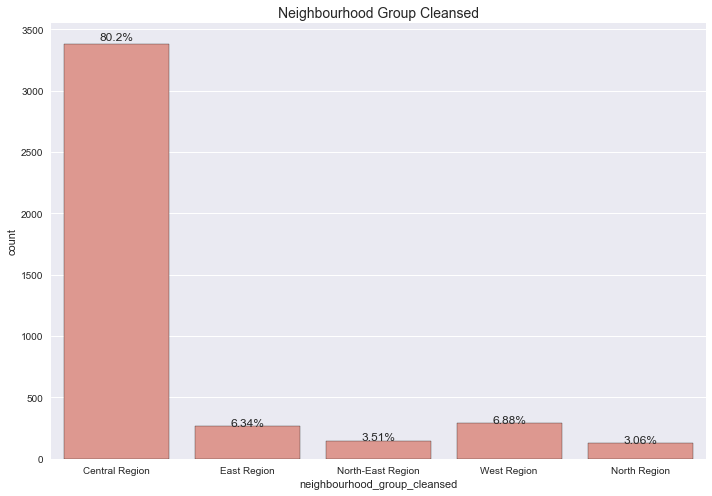

In [30]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(x='neighbourhood_group_cleansed', data=df, color=color2, edgecolor='black')
plt.title('Neighbourhood Group Cleansed', size=14)
annotate(ax)

plt.tight_layout()
plt.show()

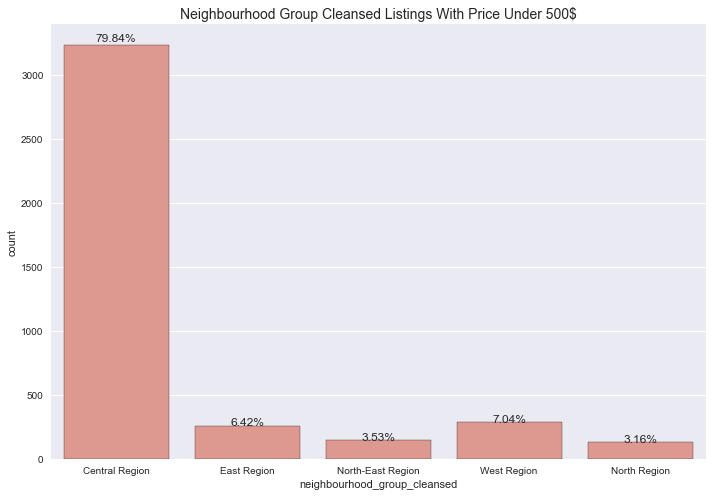

In [31]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(x='neighbourhood_group_cleansed', data=df[df['price'] <= 500] , color=color2,edgecolor='black')
plt.title('Neighbourhood Group Cleansed Listings With Price Under 500$', size=14)
annotate_under500(ax)

plt.tight_layout()
plt.show()

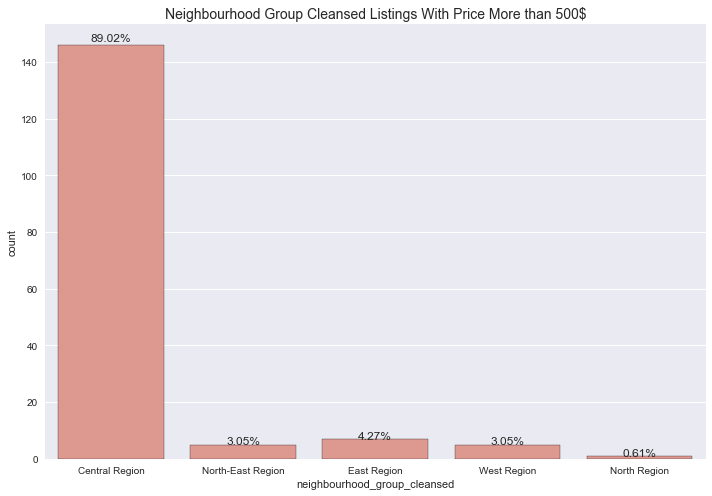

In [32]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(x='neighbourhood_group_cleansed', data=df[df['price'] > 500] , color=color2, edgecolor='black')
plt.title('Neighbourhood Group Cleansed Listings With Price More than 500$', size=14)
annotate_up500(ax)

plt.tight_layout()
plt.show()

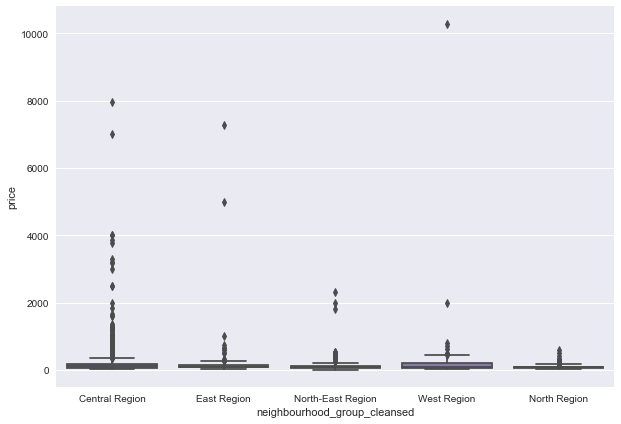

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='neighbourhood_group_cleansed', y='price')
plt.show()

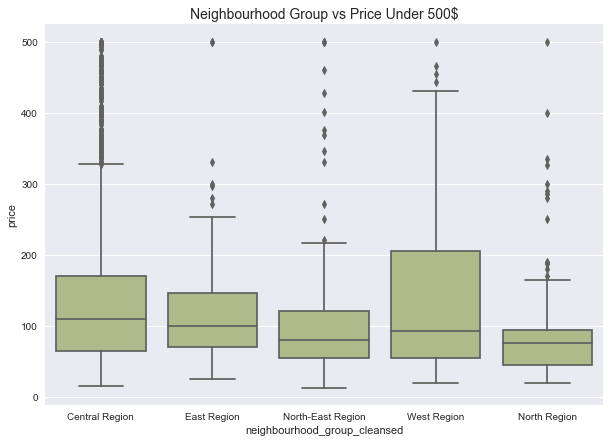

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df[df['price'] <=500] , x='neighbourhood_group_cleansed', y='price', color='#B5C182')
plt.title('Neighbourhood Group vs Price Under 500$', size=14)
plt.savefig('boxplot_location')
plt.show()

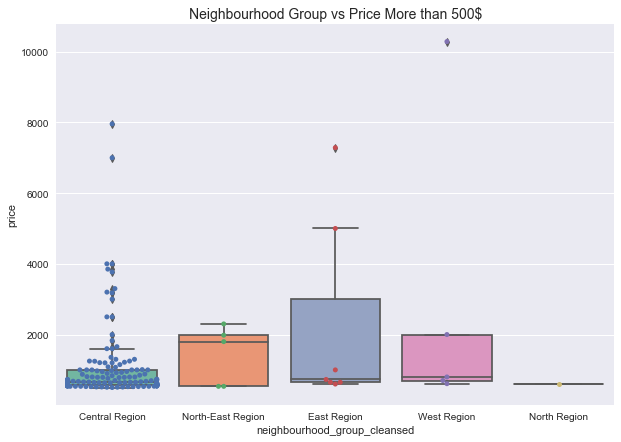

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df[df['price'] >500] , x='neighbourhood_group_cleansed', y='price', palette='Set2')
plt.title('Neighbourhood Group vs Price More than 500$', size=14)
sns.swarmplot(x = 'neighbourhood_group_cleansed', y = 'price', data = df[df['price']>500])
plt.show()

In [36]:
df[['neighbourhood_group_cleansed','price']].groupby('neighbourhood_group_cleansed').mean()

,price
neighbourhood_group_cleansed,
Central Region,172.194790
East Region,173.464419
North Region,96.488372
North-East Region,156.331081
West Region,182.948276


>#### Analysis
- 80% Listings Airbnb Singapore terletak di kawasan Central Region, termasuk listings yang memiliki harga tinggi banyak tersebar di kawasan Central Region
- Akan menarik jika kita fokuskan analisa kita terhadap kawasan Central Region. Karena dari 5 Region yang ada, kawasan Central Region berkontribusi hingga 80% terhadap analisis kita

>#### Fact
- Kawasan Central Region, East Region dan West Region memiliki harga sewa yang cenderung lebih mahal

# Type

In [37]:
types = ['property_type','room_type','bedrooms','beds','bathrooms','shared_bathrooms','amenities']
# pd.options.display.max_colwidth = None

In [38]:
df[types].head(5)

,property_type,room_type,bedrooms,beds,bathrooms,shared_bathrooms,amenities
0,Private room in rental unit,Private room,1.0,1.0,1.0,0,"[""Pool"", ""Essentials"", ""Cable TV"", ""Wifi"", ""Lo..."
1,Private room in villa,Private room,2.0,3.0,1.0,0,"[""Essentials"", ""Hair dryer"", ""Iron"", ""Hot tub""..."
2,Private room in residential home,Private room,1.0,1.0,1.0,0,"[""Essentials"", ""Hair dryer"", ""Coffee maker"", ""..."
3,Private room in residential home,Private room,1.0,2.0,1.0,0,"[""Lock on bedroom door"", ""Essentials"", ""Hair d..."
4,Private room in rental unit,Private room,1.0,1.0,1.0,0,"[""Lock on bedroom door"", ""Essentials"", ""Hair d..."


In [39]:
df['property_type'].unique()

array(['Private room in rental unit', 'Private room in villa',
       'Private room in residential home', 'Private room in loft',
       'Private room in townhouse', 'Private room',
       'Private room in condominium (condo)', 'Entire rental unit',
       'Entire residential home', 'Shared room in rental unit',
       'Private room in earth house', 'Entire townhouse',
       'Private room in bed and breakfast',
       'Shared room in bed and breakfast', 'Room in bed and breakfast',
       'Room in serviced apartment', 'Entire condominium (condo)',
       'Room in aparthotel', 'Shared room in hostel', 'Room in hostel',
       'Private room in hostel', 'Entire loft', 'Room in boutique hotel',
       'Entire serviced apartment', 'Shared room in residential home',
       'Private room in bungalow', 'Entire place',
       'Private room in guesthouse', 'Room in hotel',
       'Shared room in townhouse', 'Entire chalet',
       'Private room in serviced apartment', 'Shared room',
       'Sha

In [40]:
apartment = ['Entire home/apt','Private room in rental unit','Room in rental unit','Entire rental unit',
             'Shared room in rental unit']
serviced_apartment = ['Entire serviced apartment','Private room in serviced apartment','Room in serviced apartment']

condominium = ['Private room in condominium (condo)','Entire condominium (condo)','Shared room in condominium (condo)']
bungalow = ['Private room in bungalow','Shared room in bungalow']
loft = ['Private room in loft','Entire loft']
villa = ['Private room in villa','Entire villa','Shared room in villa']

hotel = ['Room in aparthotel','Room in hotel','Room in heritage hotel']
boutique_hotel = ['Room in boutique hotel','Shared room in boutique hotel']
hostel = ['Shared room in hostel','Room in hostel','Private room in hostel']

house = ['Private room in residential home','Entire residential home','Private room in earth house',
         'Shared room in residential home','Shared room in earth house']
guest_house = ['Private room in guesthouse','Shared room in guesthouse','Entire guesthouse','Entire guest suite',
               'Private room in guest suite']
townhouse = ['Private room in townhouse','Entire townhouse','Shared room in townhouse']
bed_and_breakfast = ['Private room in bed and breakfast','Shared room in bed and breakfast','Room in bed and breakfast']

In [41]:
def property_cat(value):

    if value in apartment:
        return 'Apartment'
    elif value in serviced_apartment:
        return 'Serviced Appartment'
    elif value in condominium:
        return 'Condominium'
    elif value in bungalow:
        return 'Bungalow'
    elif value in loft:
        return 'Loft'
    elif value in villa:
        return 'Villa'
    elif value in hotel:
        return 'Hotel'
    elif value in boutique_hotel:
        return 'Boutique Hotel'
    elif value in hostel:
        return 'Hostel'
    elif value in house:
        return 'House'
    elif value in guest_house:
        return 'Guest House'
    elif value in townhouse:
        return 'Townhouse'
    elif value in bed_and_breakfast:
        return 'Bed & Breakfast'
    else:
        return 'Other'

In [42]:
df['property_type_new'] = df['property_type'].apply(property_cat)

In [43]:
for i in ['property_type_new','room_type','shared_bathrooms']:
    print(i.upper())
    print(df[i].value_counts(), '\n')

PROPERTY_TYPE_NEW
Apartment              1552
Condominium             978
Serviced Appartment     489
Boutique Hotel          247
House                   240
Hostel                  176
Hotel                   159
Townhouse               123
Bed & Breakfast          63
Other                    59
Bungalow                 43
Loft                     38
Guest House              31
Villa                    15
Name: property_type_new, dtype: int64 

ROOM_TYPE
Private room       2124
Entire home/apt    1729
Hotel room          190
Shared room         170
Name: room_type, dtype: int64 

SHARED_BATHROOMS
0    3100
1    1113
Name: shared_bathrooms, dtype: int64 



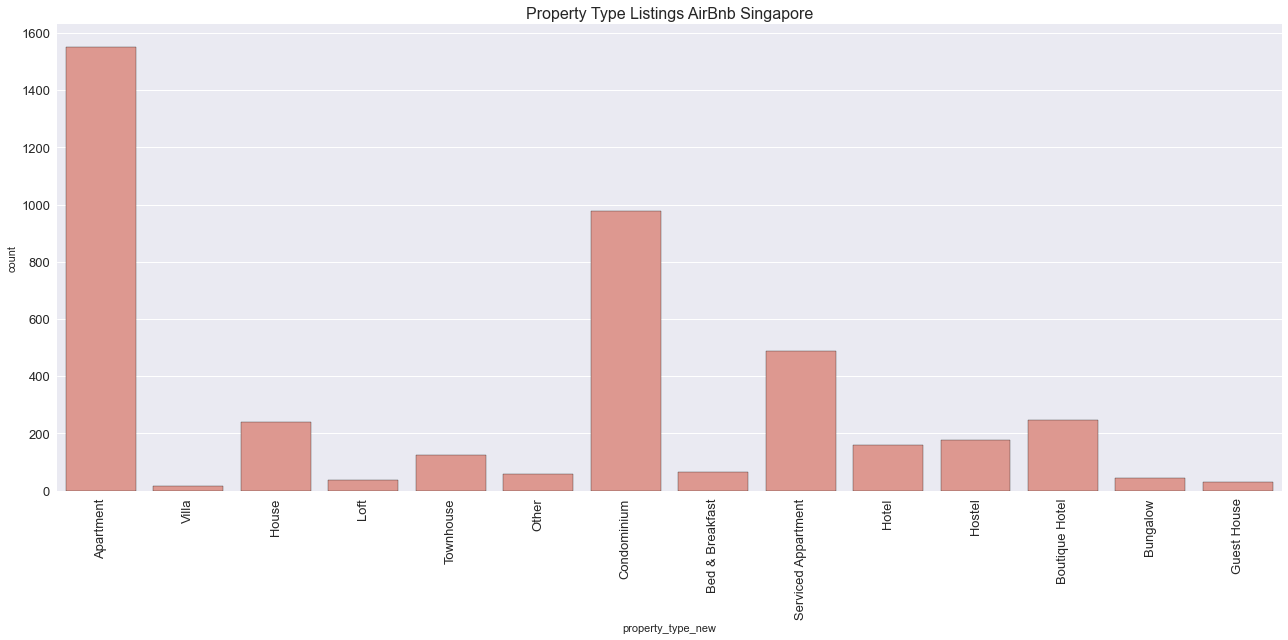

In [44]:
ax = plt.figure(figsize=(18,9))
ax = sns.countplot(data=df, x='property_type_new', color=color2, edgecolor='black')
plt.title('Property Type Listings AirBnb Singapore', size=16)
plt.xticks(size=13, rotation=90)
plt.yticks(size=13)
plt.tight_layout()
plt.show()

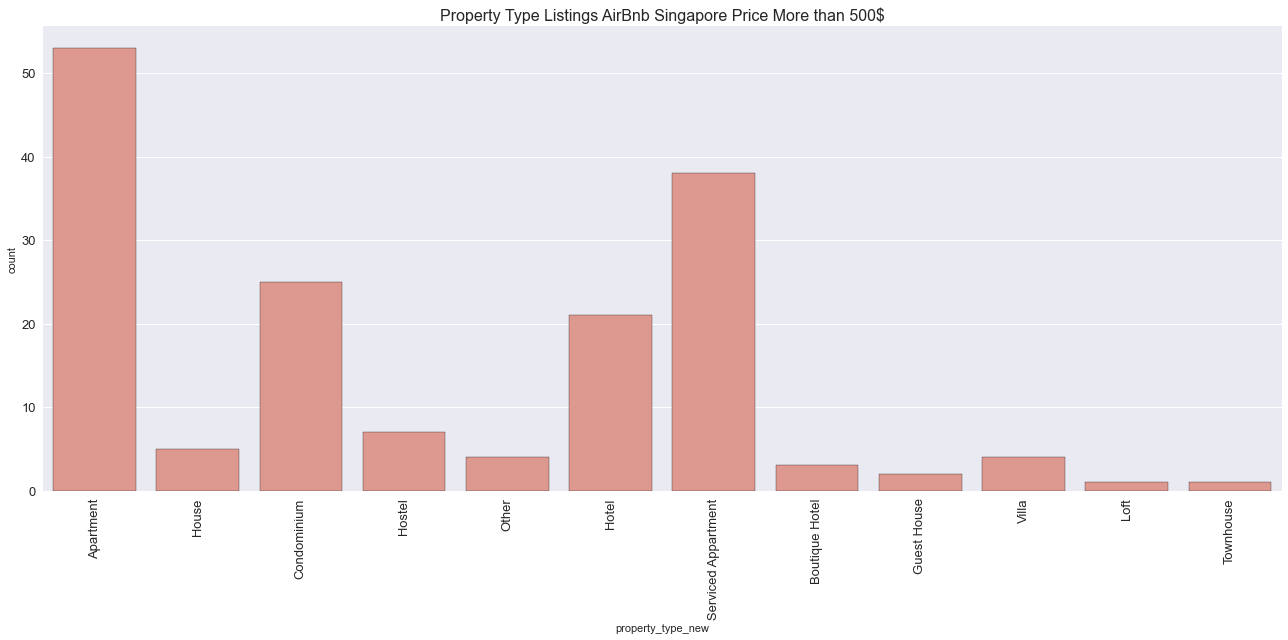

In [45]:
ax = plt.figure(figsize=(18,9))
ax = sns.countplot(data=df[df['price'] > 500] , x='property_type_new', color=color2, edgecolor='black')
plt.title('Property Type Listings AirBnb Singapore Price More than 500$', size=16)
plt.xticks(size=13, rotation=90)
plt.yticks(size=13)
plt.tight_layout()
plt.show()

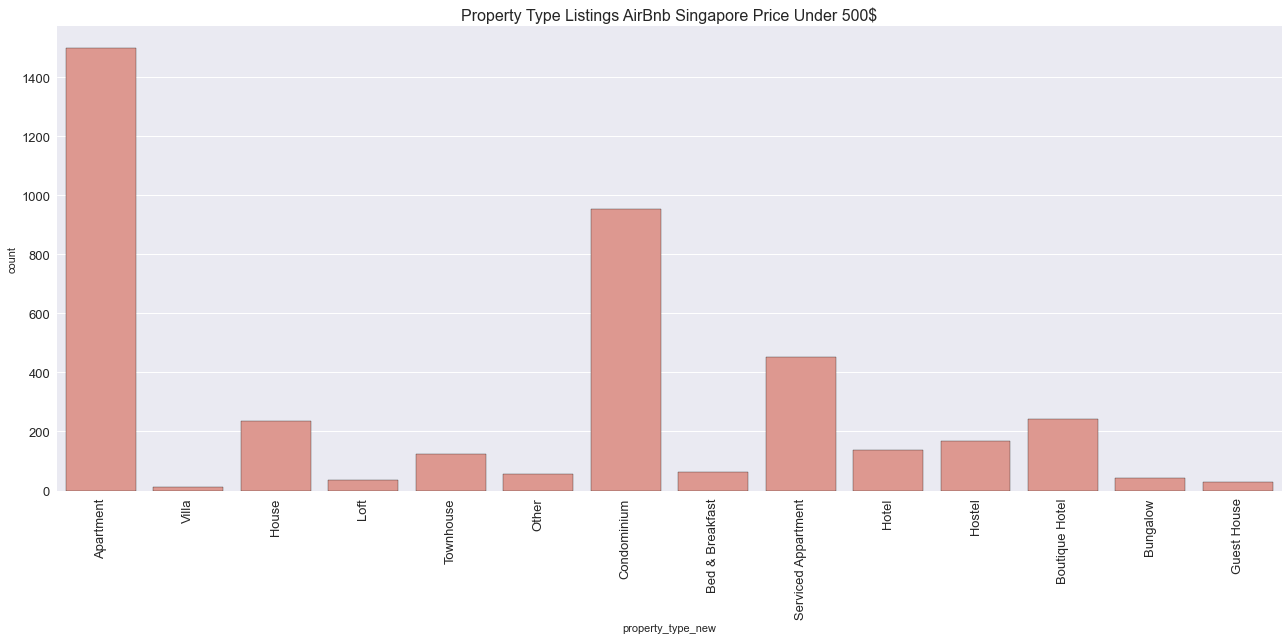

In [46]:
ax = plt.figure(figsize=(18,9))
ax = sns.countplot(data=df[df['price'] <= 500] , x='property_type_new', color=color2, edgecolor='black')
plt.title('Property Type Listings AirBnb Singapore Price Under 500$', size=16)
plt.xticks(size=13, rotation=90)
plt.yticks(size=13)
plt.tight_layout()
plt.show()

In [47]:
property_type = df[['property_type_new','price']].groupby('property_type_new').mean().sort_values(by='price')
property_type['count'] = df[['property_type_new','price']].groupby('property_type_new').count()
property_type.reset_index()

,property_type_new,price,count
0,Bed & Breakfast,98.730159,63
1,Hostel,109.340909,176
2,Townhouse,126.414634,123
3,House,128.066667,240
4,Apartment,144.148196,1552
5,Guest House,152.483871,31
6,Bungalow,156.162791,43
7,Boutique Hotel,157.044715,246
8,Loft,167.947368,38
9,Condominium,176.474438,978


<AxesSubplot:xlabel='count', ylabel='price'>

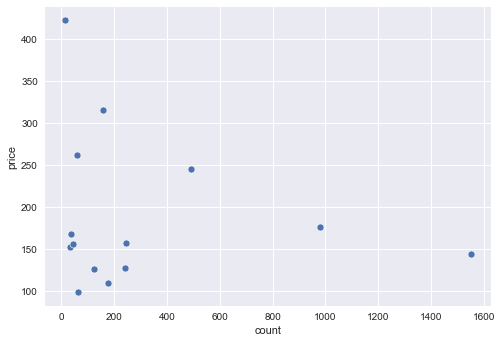

In [48]:
sns.scatterplot(x='count', y='price', data=property_type)

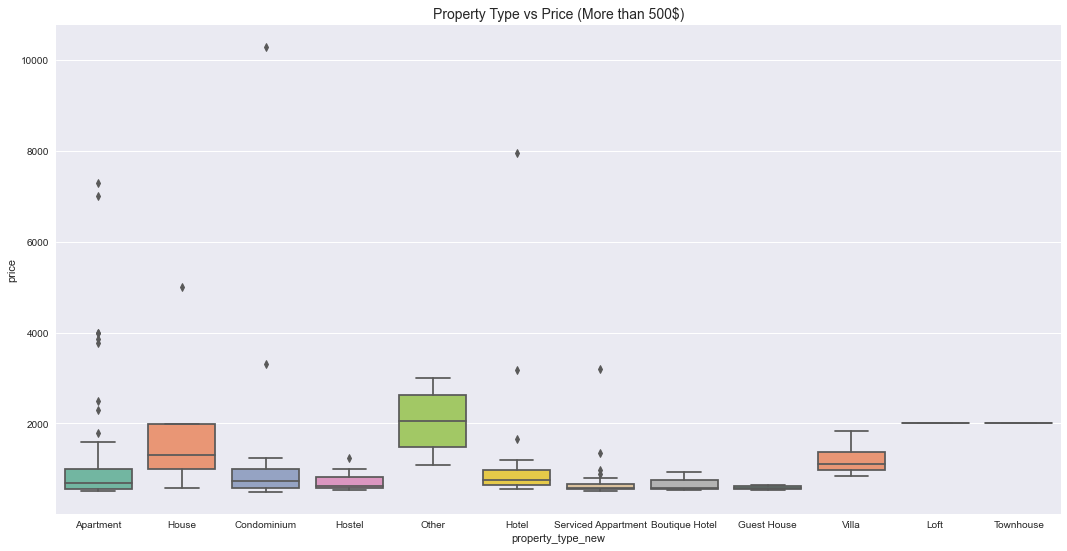

In [49]:
plt.figure(figsize=(18,9))
sns.boxplot(data=df[df['price'] > 500], x='property_type_new', y='price', palette='Set2')
plt.title('Property Type vs Price (More than 500$)', size=14)
plt.show()

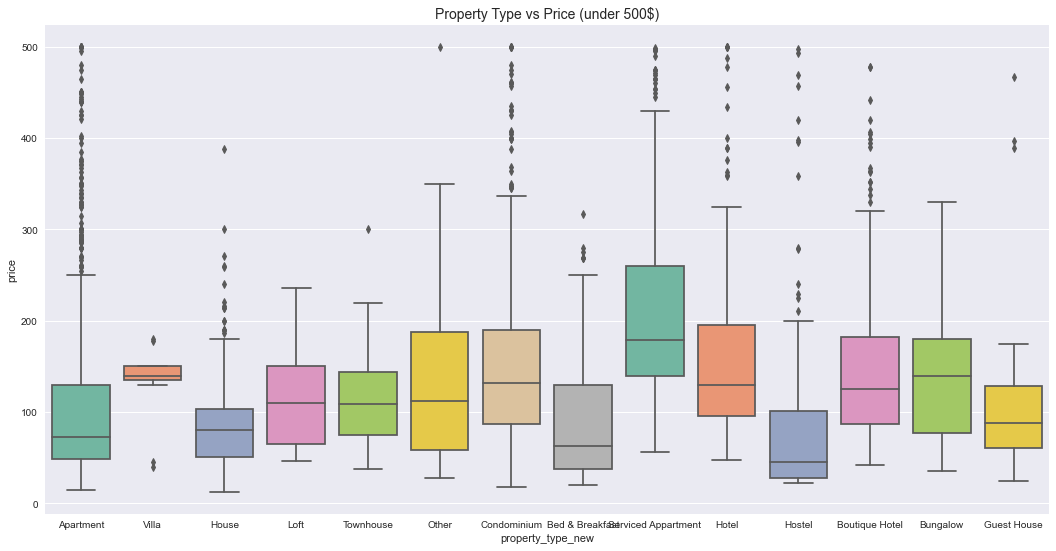

In [50]:
plt.figure(figsize=(18,9))
sns.boxplot(data=df[df['price'] <= 500], x='property_type_new', y='price', palette='Set2')
plt.title('Property Type vs Price (under 500$)', size=14)
plt.show()

In [51]:
df[df['price'] > 500][['property_type_new', 'price']].groupby('property_type_new').median().sort_values(by='price')

,price
property_type_new,
Boutique Hotel,584.0
Serviced Appartment,586.5
Guest House,588.5
Hostel,619.0
Apartment,680.0
Condominium,731.0
Hotel,760.0
Villa,1112.5
House,1300.0


In [52]:
df[df['price'] <= 500][['property_type_new', 'price']].groupby('property_type_new').median().sort_values(by='price')

,price
property_type_new,
Hostel,45.0
Bed & Breakfast,63.0
Apartment,73.0
House,80.0
Guest House,88.0
Townhouse,108.5
Loft,110.0
Other,112.0
Boutique Hotel,125.0


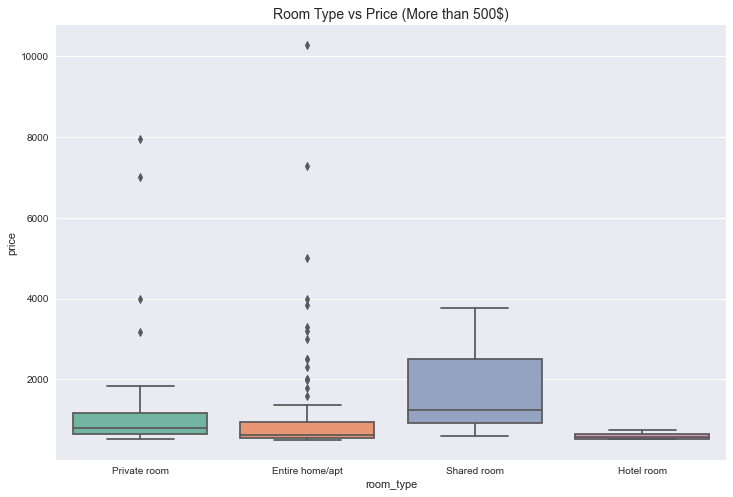

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[df['price'] > 500], x='room_type', y='price', palette='Set2')
plt.title('Room Type vs Price (More than 500$)', size=14)
plt.show()

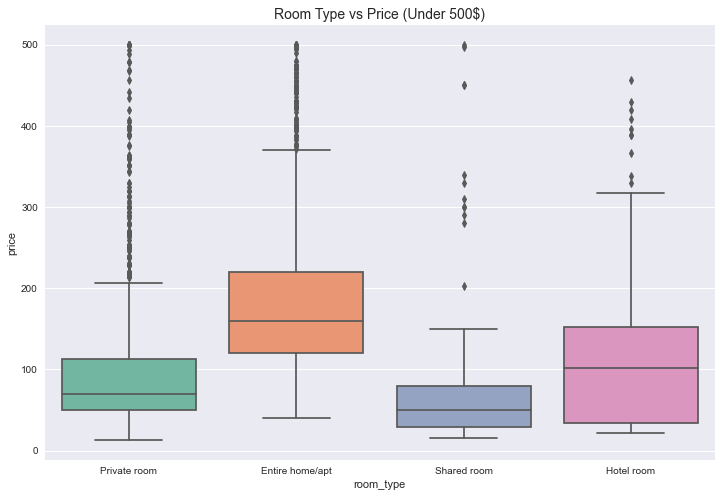

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[df['price'] <= 500], x='room_type', y='price', palette='Set2')
plt.title('Room Type vs Price (Under 500$)', size=14)
plt.show()

> #### Analysis
- Apartment, condominium dan Serviced Appartment menjadi listing yang paling banyak di Airbnb Singapore


#### Fact
- Jenis listing Serviced Appartment memiliki median harga yang paling tinggi, namun untuk listings termahal berada pada jenis condominium
- Jenis listing Villa adalah listing yang hanya ada sedikit, namun median harga sewanya terhitung mahal
- Guest host, Hotel, dan Hostel adalah jenis listings yang paling murah

# Accommodates

In [55]:
df['accommodates'].value_counts()

2     1723
1     1014
4      452
3      370
6      289
5      165
8       58
7       53
16      35
10      22
9       13
12      12
13       2
14       2
15       2
0        1
Name: accommodates, dtype: int64

<AxesSubplot:xlabel='accommodates', ylabel='price'>

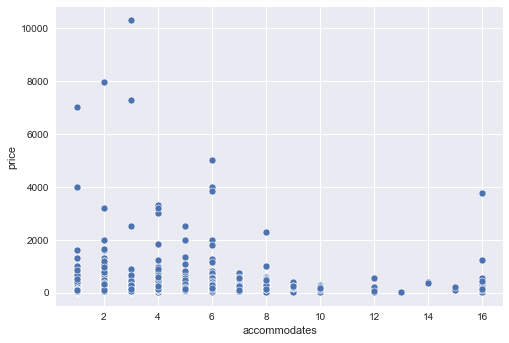

In [56]:
sns.scatterplot(x='accommodates', y='price', data=df)

# Minimum & Maximum Nights

In [57]:
df[['minimum_nights', 'maximum_nights']]

,minimum_nights,maximum_nights
0,90,730
1,90,1125
2,90,1125
3,90,1125
4,14,999
...,...,...
4208,90,365
4209,90,100
4210,14,1125
4211,1,1125


In [58]:
df[['minimum_nights', 'maximum_nights']].describe()

,minimum_nights,maximum_nights
count,4213.000000,4213.000000
mean,30.061951,949.025160
std,61.559730,2210.034788
min,1.000000,1.000000
25%,2.000000,365.000000
50%,7.000000,1125.000000
75%,30.000000,1125.000000
max,1000.000000,100000.000000


In [59]:
df['minimum_nights'].quantile(0.80)

30.0

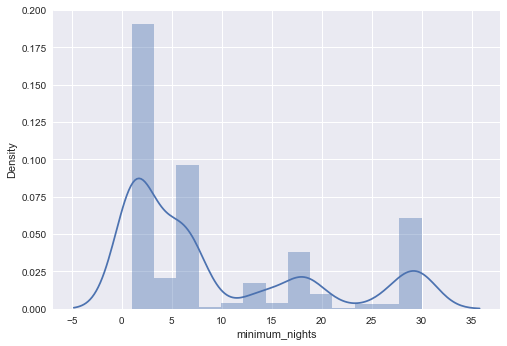

In [60]:
sns.distplot(df[df['minimum_nights'] <= 30]['minimum_nights'])
plt.show()

In [61]:
df[df['minimum_nights'] == 1000][['listing_url','property_type','price']]

,listing_url,property_type,price
1639,https://www.airbnb.com/rooms/25505227,Private room in condominium (condo),30.0
1640,https://www.airbnb.com/rooms/25516668,Private room in condominium (condo),80.0
1728,https://www.airbnb.com/rooms/27140686,Private room in condominium (condo),50.0
2739,https://www.airbnb.com/rooms/40113996,Private room in condominium (condo),30.0
2749,https://www.airbnb.com/rooms/40202857,Private room in condominium (condo),40.0


In [62]:
df[df['maximum_nights'] == 1][['listing_url','property_type','price']]

,listing_url,property_type,price
337,https://www.airbnb.com/rooms/7996456,Shared room in rental unit,50.0
465,https://www.airbnb.com/rooms/9901369,Entire condominium (condo),94.0
532,https://www.airbnb.com/rooms/11443170,Entire chalet,208.0
1427,https://www.airbnb.com/rooms/23329869,Room in serviced apartment,164.0
1810,https://www.airbnb.com/rooms/28821061,Entire condominium (condo),91.0
1834,https://www.airbnb.com/rooms/29148255,Private room in condominium (condo),140.0
1877,https://www.airbnb.com/rooms/29845294,Private room in rental unit,140.0
2743,https://www.airbnb.com/rooms/40142529,Private room in rental unit,220.0
3354,https://www.airbnb.com/rooms/43705606,Room in hotel,500.0
3355,https://www.airbnb.com/rooms/43705738,Room in hotel,500.0


In [63]:
df[['minimum_nights','maximum_nights','price']].corr()

,minimum_nights,maximum_nights,price
minimum_nights,1.000000,0.032056,-0.022066
maximum_nights,0.032056,1.000000,-0.002537
price,-0.022066,-0.002537,1.000000


<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

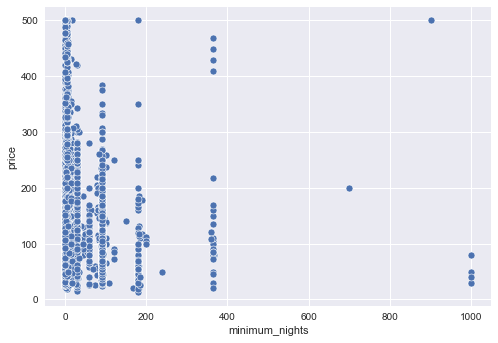

In [64]:
sns.scatterplot(data=df[df['price'] <=500], x='minimum_nights', y='price')

In [65]:
def nights(value):
    if value == 1:
        return '1. 1 day'
    elif value <= 5:
        return '2. 2-5 days'
    elif value <= 10:
        return '3. 6-10 days'
    elif value <= 15:
        return '4. 11-15 days'
    elif value <= 20:
        return '5. 16-20 days'
    elif value <= 25:
        return '6. 21-25 days'
    elif value <= 30:
        return '7. 26-30 days'
    else:
        return '7. >31 days'  

In [66]:
df['minimum_nights_new'] = df['minimum_nights'].apply(nights)

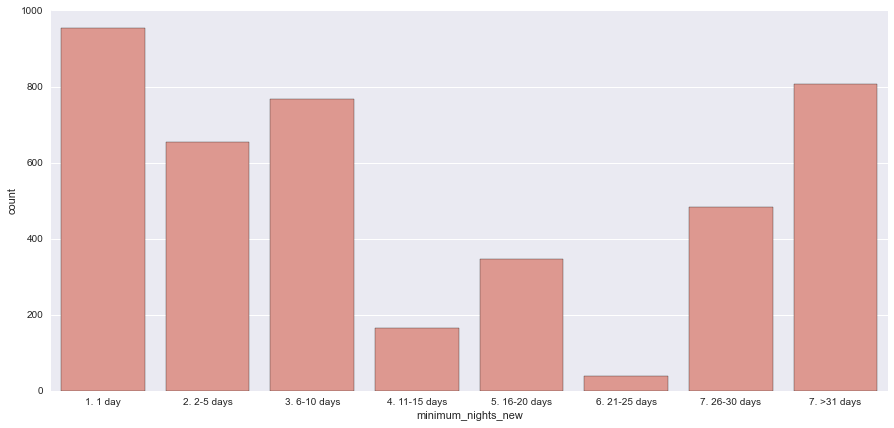

In [67]:
plt.figure(figsize=(15,7))
sns.countplot(data=df.sort_values(by='minimum_nights_new') , x='minimum_nights_new', color=color2, edgecolor='black')
plt.show()

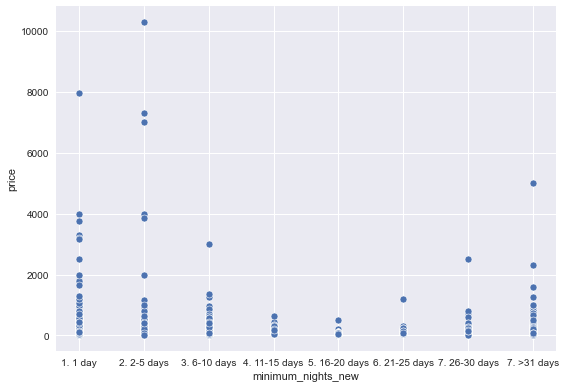

In [68]:
sns.scatterplot(data=df.sort_values(by='minimum_nights_new') , x='minimum_nights_new', y='price')
plt.tight_layout()
plt.show()

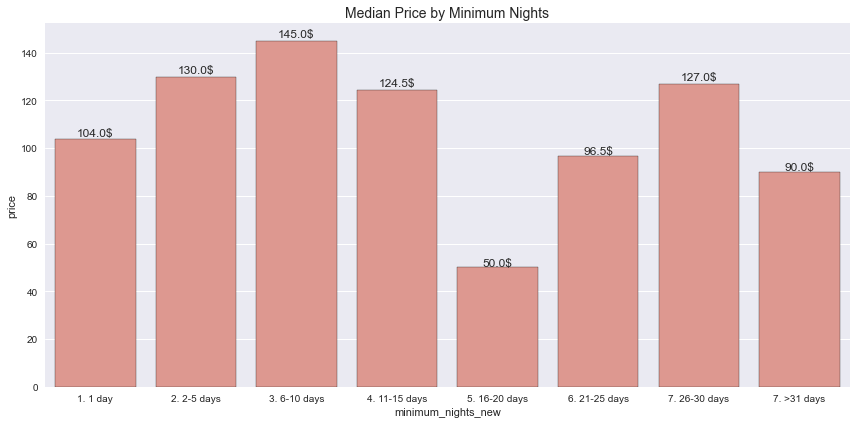

In [69]:
df_nights = df[['minimum_nights_new','price']].groupby('minimum_nights_new').median().reset_index()

ax = plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_nights, x='minimum_nights_new', y='price', color=color2, edgecolor='black')
plt.title('Median Price by Minimum Nights', size=14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}'+"$", (x + width/2, y + height*1.01), ha='center', size=12)
plt.tight_layout()
plt.show()

In [70]:
df_summary = df[['property_type_new','minimum_nights','maximum_nights','price']].groupby('property_type_new').median()
df_summary.sort_values(by='minimum_nights')

,minimum_nights,maximum_nights,price
property_type_new,,,
Bed & Breakfast,1.0,1125.0,63.0
Boutique Hotel,1.0,999.0,125.0
Hostel,1.0,1125.0,47.0
Hotel,1.0,365.0,145.0
Other,1.0,1125.0,126.0
Serviced Appartment,6.0,1125.0,191.0
Bungalow,7.0,1125.0,140.0
Guest House,7.0,1125.0,90.0
House,7.0,1125.0,80.0


In [71]:
df_summary.corr()

,minimum_nights,maximum_nights,price
minimum_nights,1.000000,0.281877,0.063638
maximum_nights,0.281877,1.000000,-0.241577
price,0.063638,-0.241577,1.000000


# Availability

In [72]:
availability = ['availability_30','availability_60','availability_90','availability_365']
df[availability]

,availability_30,availability_60,availability_90,availability_365
0,29,59,89,364
1,30,60,90,365
2,30,60,90,365
3,30,60,90,365
4,29,59,89,364
...,...,...,...,...
4208,30,60,90,90
4209,5,35,65,105
4210,30,60,90,365
4211,30,60,90,90


In [73]:
df[availability+['price']].corr()

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.000000,0.950784,0.900135,0.492785,0.054132
availability_60,0.950784,1.000000,0.983513,0.533399,0.041645
availability_90,0.900135,0.983513,1.000000,0.549408,0.034257
availability_365,0.492785,0.533399,0.549408,1.000000,0.011951
price,0.054132,0.041645,0.034257,0.011951,1.000000


<AxesSubplot:xlabel='availability_30', ylabel='Density'>

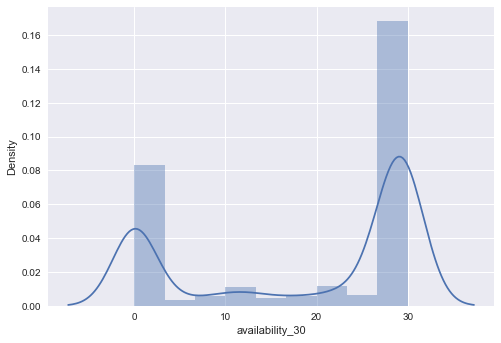

In [74]:
sns.distplot(df['availability_30'])

In [75]:
def avail_30(value):
    if value >=0 and value <=7:
        return '1. 0-7'
    elif value >=8 and value <=14:
        return '2. 8-14'
    elif value >=15 and value <=21:
        return '3. 15-21'
    elif value >=22:
        return '4. 22-30'

In [76]:
df['availability_30_new'] = df['availability_30'].apply(avail_30)
df['availability_30_new'].value_counts()

4. 22-30    2570
1. 0-7      1237
2. 8-14      248
3. 15-21     158
Name: availability_30_new, dtype: int64

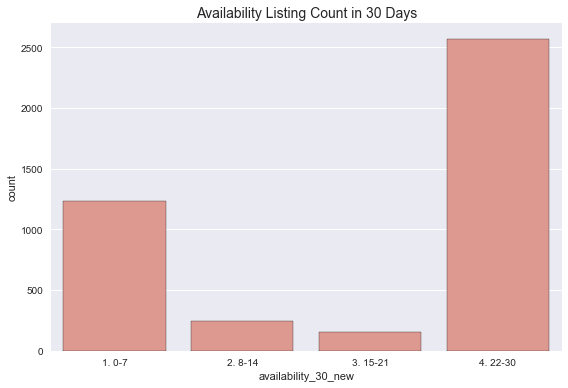

In [77]:
sns.countplot(data=df.sort_values('availability_30_new') , x='availability_30_new', color=color2, edgecolor='black')
plt.title('Availability Listing Count in 30 Days', size=14)
plt.tight_layout()
plt.show()

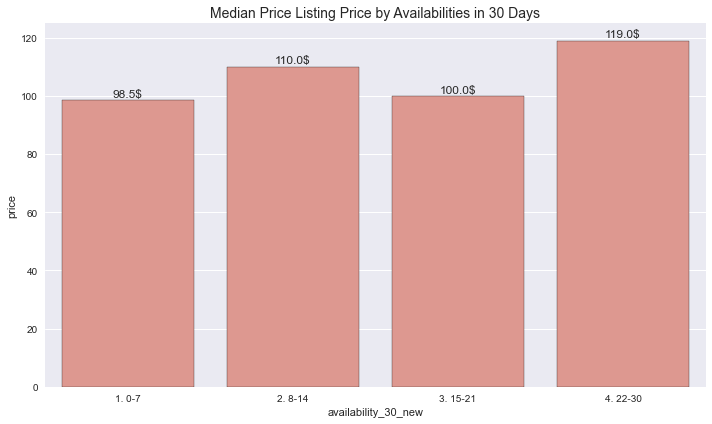

In [78]:
df_avail30 = df[['availability_30_new','price']].groupby('availability_30_new').median().reset_index()

ax = plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_avail30, x='availability_30_new', y='price', color=color2, edgecolor='black')
plt.title('Median Price Listing Price by Availabilities in 30 Days',size=14)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}'+"$", (x + width/2, y + height*1.01), ha='center', size=12)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='availability_30_new', ylabel='price'>

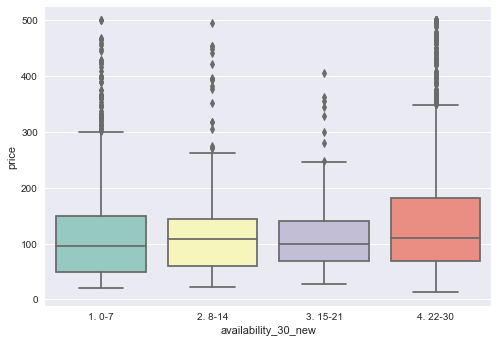

In [79]:
sns.boxplot(data=df[df['price'] <=500].sort_values(by='availability_30_new'), x='availability_30_new', y='price', palette='Set3')

In [80]:
pd.pivot_table(df[availability+['price','listing_url','room_type']], 
               index = 'room_type',
               aggfunc = {'availability_30':np.mean,
                          'availability_60':np.mean,
                          'availability_90':np.mean,
                          'availability_365':np.mean,
                          'price':np.median,
                          'listing_url':len}
            
              )

,availability_30,availability_365,availability_60,availability_90,listing_url,price
room_type,,,,,,
Entire home/apt,19.258531,251.434355,42.607866,67.358010,1729,165.0
Hotel room,15.373684,210.773684,34.215789,54.126316,190,106.0
Private room,19.057439,260.401130,41.425612,64.739171,2124,70.5
Shared room,18.094118,279.282353,38.858824,62.888235,170,50.0


In [81]:
df_summary_avail = pd.pivot_table(df[availability+['price','listing_url','property_type_new']], 
               index = 'property_type_new',
               aggfunc = {'availability_30':np.mean,
                          'availability_60':np.mean,
                          'availability_90':np.mean,
                          'availability_365':np.mean,
                          'price':np.median,
                          'listing_url':len}
              )
df_summary_avail

,availability_30,availability_365,availability_60,availability_90,listing_url,price
property_type_new,,,,,,
Apartment,18.807990,259.756443,41.838273,65.805412,1552,75.0
Bed & Breakfast,19.666667,292.317460,42.142857,66.269841,63,63.0
Boutique Hotel,23.319838,316.044534,48.838057,75.028340,247,125.0
Bungalow,15.953488,297.000000,36.906977,59.162791,43,140.0
Condominium,18.926380,238.987730,40.436605,63.120654,978,135.0
Guest House,21.903226,242.193548,44.580645,68.096774,31,90.0
Hostel,14.829545,225.653409,32.062500,52.295455,176,47.0
Hotel,19.383648,250.132075,39.685535,60.540881,159,145.0
House,17.725000,240.604167,38.658333,60.854167,240,80.0


In [82]:
df[availability+['minimum_nights','maximum_nights']].corr()

,availability_30,availability_60,availability_90,availability_365,minimum_nights,maximum_nights
availability_30,1.000000,0.950784,0.900135,0.492785,0.073142,-0.005331
availability_60,0.950784,1.000000,0.983513,0.533399,0.048807,-0.007917
availability_90,0.900135,0.983513,1.000000,0.549408,0.034280,-0.010411
availability_365,0.492785,0.533399,0.549408,1.000000,0.008670,0.000624
minimum_nights,0.073142,0.048807,0.034280,0.008670,1.000000,0.032056
maximum_nights,-0.005331,-0.007917,-0.010411,0.000624,0.032056,1.000000


In [83]:
# Split data menjadi 2 bagian
# df_availability_other = data ketersediaan listing selain 22-30
# df_availability_22_30 = data ketersediaan listing yang 22-30

df_availability_other = df[~(df['availability_30_new'] == df['availability_30_new'].value_counts().index[0])]
df_availability_22_30 = df[df['availability_30_new'] == df['availability_30_new'].value_counts().index[0]]

In [84]:
df_availability_22_30['room_type'].value_counts()/df_availability_22_30.shape[0]*100

Private room       51.245136
Entire home/apt    41.050584
Shared room         4.085603
Hotel room          3.618677
Name: room_type, dtype: float64

In [85]:
df_availability_other['room_type'].value_counts()/df_availability_22_30.shape[0]*100

Private room       31.400778
Entire home/apt    26.225681
Hotel room          3.774319
Shared room         2.529183
Name: room_type, dtype: float64

In [86]:
df_availability_22_30['property_type_new'].value_counts()/df_availability_22_30.shape[0]*100

Apartment              36.225681
Condominium            23.657588
Serviced Appartment    10.583658
Boutique Hotel          7.354086
House                   5.408560
Hotel                   4.007782
Townhouse               3.891051
Hostel                  3.463035
Bed & Breakfast         1.595331
Loft                    1.089494
Other                   0.933852
Guest House             0.856031
Bungalow                0.817121
Villa                   0.116732
Name: property_type_new, dtype: float64

In [87]:
df_availability_other['property_type_new'].value_counts()/df_availability_22_30.shape[0]*100

Apartment              24.163424
Condominium            14.396887
Serviced Appartment     8.443580
House                   3.929961
Hostel                  3.385214
Boutique Hotel          2.256809
Hotel                   2.178988
Other                   1.361868
Townhouse               0.894942
Bungalow                0.856031
Bed & Breakfast         0.856031
Villa                   0.466926
Loft                    0.389105
Guest House             0.350195
Name: property_type_new, dtype: float64

In [88]:
df_availability_22_30['neighbourhood_group_cleansed'].value_counts()/df_availability_22_30.shape[0]*100

Central Region       81.361868
West Region           6.108949
East Region           5.642023
North Region          3.540856
North-East Region     3.346304
Name: neighbourhood_group_cleansed, dtype: float64

In [89]:
df_availability_other['neighbourhood_group_cleansed'].value_counts()/df_availability_22_30.shape[0]*100

Central Region       50.116732
West Region           5.175097
East Region           4.747082
North-East Region     2.412451
North Region          1.478599
Name: neighbourhood_group_cleansed, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

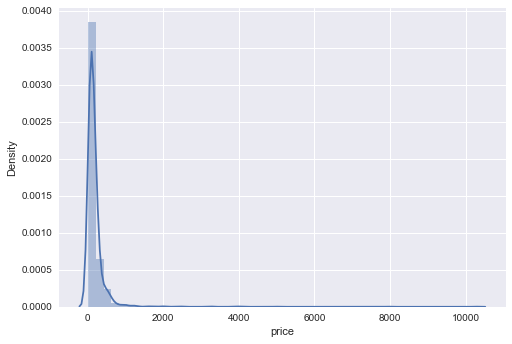

In [90]:
sns.distplot(df_availability_22_30['price'])

In [91]:
# Jika availability dari listing tersebut 22-30 maka indikatornya 1 jika bukan 0
df['availablity_22_30_indicator'] = np.where(df['availability_30_new'] == df['availability_30_new'].value_counts().index[0], 1, 0) 

In [92]:
pd.crosstab(df['room_type'],df['availablity_22_30_indicator'], margins = True)

availablity_22_30_indicator,0,1,All
room_type,,,
Entire home/apt,674,1055,1729
Hotel room,97,93,190
Private room,807,1317,2124
Shared room,65,105,170
All,1643,2570,4213


In [93]:
pd.crosstab(df['room_type'],df['availablity_22_30_indicator'], normalize = True)

availablity_22_30_indicator,0,1
room_type,,
Entire home/apt,0.159981,0.250415
Hotel room,0.023024,0.022075
Private room,0.191550,0.312604
Shared room,0.015428,0.024923


In [94]:
pd.crosstab(df['property_type_new'],df['availablity_22_30_indicator'], margins = True)

availablity_22_30_indicator,0,1,All
property_type_new,,,
Apartment,621,931,1552
Bed & Breakfast,22,41,63
Boutique Hotel,58,189,247
Bungalow,22,21,43
Condominium,370,608,978
Guest House,9,22,31
Hostel,87,89,176
Hotel,56,103,159
House,101,139,240


In [95]:
pd.crosstab(df['property_type_new'],df['availablity_22_30_indicator'], normalize= True)

availablity_22_30_indicator,0,1
property_type_new,,
Apartment,0.147401,0.220983
Bed & Breakfast,0.005222,0.009732
Boutique Hotel,0.013767,0.044861
Bungalow,0.005222,0.004985
Condominium,0.087823,0.144315
Guest House,0.002136,0.005222
Hostel,0.020650,0.021125
Hotel,0.013292,0.024448
House,0.023973,0.032993


In [96]:
pd.crosstab(df['neighbourhood_group_cleansed'],df['availablity_22_30_indicator'], margins = True)

availablity_22_30_indicator,0,1,All
neighbourhood_group_cleansed,,,
Central Region,1288,2091,3379
East Region,122,145,267
North Region,38,91,129
North-East Region,62,86,148
West Region,133,157,290
All,1643,2570,4213


In [97]:
pd.crosstab(df['neighbourhood_group_cleansed'],df['availablity_22_30_indicator'], normalize = True)

availablity_22_30_indicator,0,1
neighbourhood_group_cleansed,,
Central Region,0.305720,0.496321
East Region,0.028958,0.034417
North Region,0.009020,0.021600
North-East Region,0.014716,0.020413
West Region,0.031569,0.037266


In [98]:
pd.crosstab(df['host_is_superhost'],df['availablity_22_30_indicator'], margins = True)

availablity_22_30_indicator,0,1,All
host_is_superhost,,,
0,1265,2265,3530
1,378,305,683
All,1643,2570,4213


In [99]:
pd.crosstab(df['host_is_superhost'],df['availablity_22_30_indicator'], normalize= True)

availablity_22_30_indicator,0,1
host_is_superhost,,
0,0.300261,0.537622
1,0.089722,0.072395


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

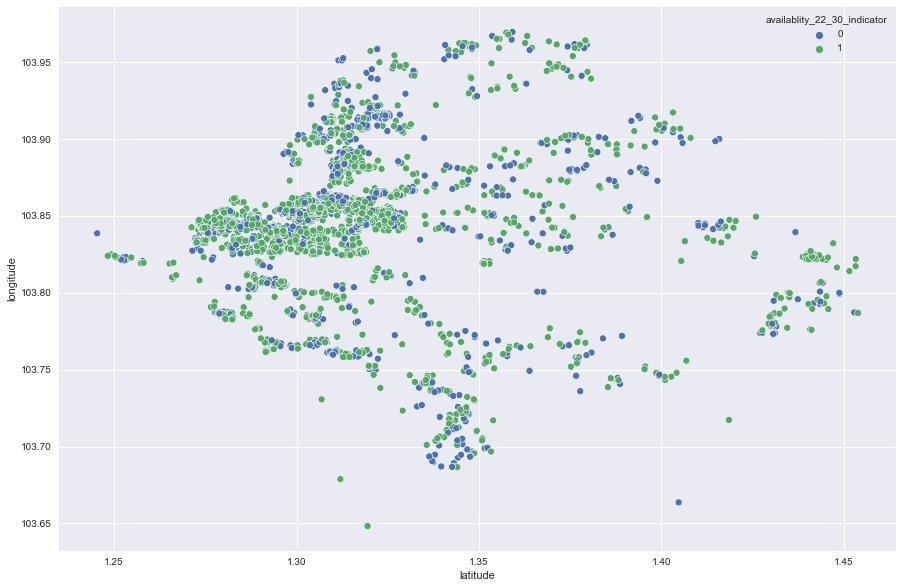

In [100]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = 'latitude', y = 'longitude', data = df, hue = 'availablity_22_30_indicator')

# Review

In [101]:
reviews = ['number_of_reviews_ltm','first_review','last_review','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
           'review_scores_location','review_scores_value','reviews_per_month']
df[reviews]

,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,0,2014-10-14,2014-07-08,4.56,4.72,4.78,4.78,4.94,4.72,4.50,0.21
1,0,2015-10-05,2019-12-28,4.44,4.37,4.00,4.63,4.78,4.26,4.32,0.27
2,0,2015-08-14,2014-12-10,4.16,4.22,4.09,4.43,4.43,4.17,4.04,0.32
3,0,2015-08-16,2019-10-21,4.42,4.40,4.53,4.64,4.64,4.51,4.38,0.64
4,0,2013-04-20,2019-10-17,4.39,4.12,4.24,4.53,4.47,4.53,4.59,0.19
...,...,...,...,...,...,...,...,...,...,...,...
4208,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4209,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4210,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4211,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df[reviews].describe()

,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,4213.000000,2406.000000,2351.000000,2352.000000,2351.000000,2352.000000,2350.000000,2350.000000,2406.000000
mean,0.978400,4.477855,4.634402,4.521977,4.762956,4.750910,4.684957,4.513604,0.647976
std,5.499267,0.886277,0.582956,0.635767,0.504569,0.539484,0.497604,0.592963,1.460600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,4.380000,4.500000,4.327500,4.740000,4.740000,4.550000,4.330000,0.070000
50%,0.000000,4.750000,4.830000,4.730000,4.940000,4.940000,4.830000,4.670000,0.200000
75%,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.750000
max,185.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,36.320000


In [103]:
df[reviews+['price']].corr()['price']

number_of_reviews_ltm         -0.026222
review_scores_rating           0.025683
review_scores_accuracy         0.024557
review_scores_cleanliness      0.056402
review_scores_checkin         -0.002819
review_scores_communication   -0.005493
review_scores_location         0.008690
review_scores_value            0.005652
reviews_per_month             -0.024459
price                          1.000000
Name: price, dtype: float64

# Income & Omzet Analysist

In [104]:
current_omzet_in_30days = np.sum(df['price']*(30-df['availability_30']))
print(current_omzet_in_30days)

6914612.0


In [105]:
max_omzet_in30_days = np.sum(df['price']*30)
print(max_omzet_in30_days)

21498840.0


In [106]:
loss_income = max_omzet_in30_days - current_omzet_in_30days
loss_income

14584228.0

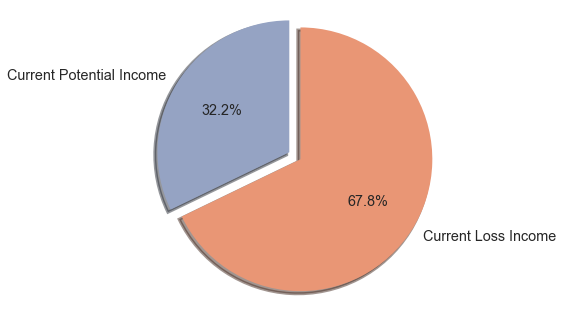

In [107]:
labels = 'Current Potential Income','Current Loss Income'
sizes = [current_omzet_in_30days, max_omzet_in30_days-current_omzet_in_30days]
explode = (0, 0.1)
color = ['#95A3C3','#E99675']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=color,
        shadow=True, startangle=90,
        wedgeprops={'linewidth': 3.0},
        textprops={'size': 'x-large'})
ax1.axis('equal')

plt.show()

In [108]:
df['monthly income'] = df['price']*(30-df['availability_30'])
df['potential monthly income'] = df['price']*30
df['monthly income loss'] = df['potential monthly income'] - df['monthly income']
df['percentage monthly income'] = df['monthly income']/df['potential monthly income']

In [109]:
print('full empty  :',np.sum(df['availability_30'] == 30)*100/df.shape[0])
print('more than 22:',np.sum(df['availability_30'] >= 22)*100/df.shape[0])
print('more than 15:',np.sum(df['availability_30'] >= 15)*100/df.shape[0])
print('more than 7 :',np.sum(df['availability_30'] >= 7)*100/df.shape[0])

full empty  : 20.484215523380016
more than 22: 61.001661523854736
more than 15: 64.75195822454307
more than 7 : 71.0182767624021


In [110]:
# air_bnb[['neighbourhood_cleansed new','potential monthly income','monthly income','percentage monthly income']].groupby('neighbourhood_cleansed new').sum().sort_values('monthly income', ascending=False)
pd.pivot_table(df, 
               index = 'neighbourhood_group_cleansed',
               values = ['potential monthly income','monthly income','monthly income loss','percentage monthly income'],
               aggfunc = {'potential monthly income':np.sum,'monthly income':np.sum,'monthly income loss':np.sum,'percentage monthly income':np.mean}
              ).sort_values(by = 'monthly income loss', ascending = False)

,monthly income,monthly income loss,percentage monthly income,potential monthly income
neighbourhood_group_cleansed,,,,
Central Region,5455045.0,11995175.0,0.356118,17450220.0
West Region,491391.0,1100259.0,0.438851,1591650.0
East Region,635672.0,753778.0,0.448814,1389450.0
North-East Region,239652.0,454458.0,0.424099,694110.0
North Region,92852.0,280558.0,0.310594,373410.0


In [111]:
pd.pivot_table(df, 
               index = 'neighbourhood_cleansed_new',
               values = ['potential monthly income','monthly income','monthly income loss','percentage monthly income'],
               aggfunc = {'potential monthly income':np.sum,'monthly income':np.sum,'monthly income loss':np.sum,'percentage monthly income':np.mean}
              ).sort_values(by = 'monthly income loss', ascending = False)

,monthly income,monthly income loss,percentage monthly income,potential monthly income
neighbourhood_cleansed_new,,,,
Orchard,299499.0,1103121.0,0.345528,1402620.0
Downtown Core,652612.0,1064858.0,0.347152,1717470.0
Kallang,704120.0,1059730.0,0.450952,1763850.0
Novena,312701.0,1009669.0,0.257835,1322370.0
Other,387297.0,956463.0,0.423106,1343760.0
Geylang,395185.0,935795.0,0.362066,1330980.0
Queenstown,234101.0,932539.0,0.202718,1166640.0
Rochor,469949.0,849121.0,0.392500,1319070.0
Bukit Merah,280314.0,815736.0,0.385316,1096050.0


In [112]:
pd.pivot_table(df, 
               index = 'room_type',
               values = ['potential monthly income','monthly income','monthly income loss','percentage monthly income'],
               aggfunc = {'potential monthly income':np.sum,'monthly income':np.sum,'monthly income loss':np.sum,'percentage monthly income':np.mean}
              ).sort_values(by = 'monthly income loss', ascending = False)

,monthly income,monthly income loss,percentage monthly income,potential monthly income
room_type,,,,
Entire home/apt,3684039.0,8770581.0,0.358049,12454620.0
Private room,2500142.0,5226298.0,0.364752,7726440.0
Shared room,252494.0,298846.0,0.396863,551340.0
Hotel room,477937.0,288503.0,0.484832,766440.0


# Data Preparation for Modeling

> ### Preprocessing
- Extract Amenities
- Handling missing value
- One hot encoding
- Binary encoding

# Extract Amenities Column

In [113]:
def item_counter(item):
    count = 0
    for i in df.index:
        if item in df["amenities"][i]:
            count += 1
    return count

In [114]:
(item_counter("Hot tub")/len(df))*100

7.856634227391407

In [115]:
(item_counter("Dryer")/len(df))*100

67.69522905293141

In [116]:
(item_counter("Shampoo")/len(df))*100

60.02848326608118

In [117]:
(item_counter("Hangers")/len(df))*100

80.84500356040826

In [118]:
(item_counter("Iron")/len(df))*100

76.07405649181106

In [119]:
(item_counter("Lockbox")/len(df))*100

2.5634939473059575

In [120]:
(item_counter("Dishes and silverware")/len(df))*100

45.28839306907192

In [121]:
(item_counter("Room-darkening shades")/len(df))*100

2.634702112508901

In [122]:
(item_counter("Hot water")/len(df))*100

64.30097317825776

In [123]:
(item_counter("Bed linens")/len(df))*100

44.694991692380725

In [124]:
(item_counter("Microwave")/len(df))*100

46.54640398765725

In [125]:
(item_counter("Coffee maker")/len(df))*100

6.147638262520768

In [126]:
(item_counter("Cooking basics")/len(df))*100

41.89413719439829

In [127]:
(item_counter("Stove")/len(df))*100

38.33372893425113

In [128]:
(item_counter("Patio or balcony")/len(df))*100

12.69878946119155

In [129]:
(item_counter("Long term stays allowed")/len(df))*100

98.17232375979113

In [130]:
(item_counter("First aid kit")/len(df))*100

26.46570140042725

In [131]:
(item_counter("Fire extinguisher")/len(df))*100

42.44006646095419

In [132]:
(item_counter("Pool")/len(df))*100

48.397816282933775

In [133]:
(item_counter("Private entrance")/len(df))*100

32.3047709470686

In [134]:
(item_counter("Luggage dropoff allowed")/len(df))*100

31.782577735580347

In [135]:
(item_counter("Paid parking off premises")/len(df))*100

19.06005221932115

In [136]:
(item_counter("Extra pillows and blankets")/len(df))*100

25.990980299074295

In [137]:
(item_counter("Ethernet connection")/len(df))*100

3.8452409209589367

In [138]:
(item_counter("Lock on bedroom door")/len(df))*100

39.14075480655115

In [139]:
(item_counter("Host greets you")/len(df))*100

13.909328269641586

In [140]:
(item_counter('Cleaning before checkout')/len(df))*100

7.19202468549727

In [141]:
(item_counter('Kitchenette')/len(df))*100

0.023736055067647758

In [142]:
(item_counter('Pocket wifi')/len(df))*100

1.0206503679088537

In [143]:
(item_counter('Smart lock')/len(df))*100

1.5665796344647518

In [144]:
(item_counter("Oven")/len(df))*100

25.658675528127223

In [145]:
(item_counter("Single level home")/len(df))*100

13.98053643484453

In [146]:
(item_counter("Crib")/len(df))*100

11.369570377403274

In [147]:
(item_counter("Heating")/len(df))*100

31.59268929503917

In [148]:
(item_counter("Washer")/len(df))*100

84.80892475670544

In [149]:
(item_counter("Wifi")/len(df))*100

96.72442440066462

In [150]:
(item_counter("Air conditioning")/len(df))*100

96.79563256586755

In [151]:
(item_counter("Hair dryer")/len(df))*100

68.85829575124615

In [152]:
(item_counter("Refrigerator")/len(df))*100

50.629005459292664

In [153]:
(item_counter("Smoke alarm")/len(df))*100

44.33895086636601

In [154]:
(item_counter("Essentials")/len(df))*100

85.54474246380252

In [155]:
(item_counter("Kitchen")/len(df))*100

78.40018988844054

In [156]:
(item_counter("TV")/len(df))*100

72.72727272727273

In [157]:
df["heating"] = df["amenities"].apply(lambda x: int("Heating" in x))
df["wifi"] = df["amenities"].apply(lambda x: int("Wifi" in x))
df["ac"] = df["amenities"].apply(lambda x: int("Air conditioning" in x))
df["hairdryer"] = df["amenities"].apply(lambda x: int("Hair dryer" in x))
df["refrigerator"] = df["amenities"].apply(lambda x: int("Refrigerator" in x))
df["smoke"] = df["amenities"].apply(lambda x: int("Smoke alarm" in x))
df["essentials"] = df["amenities"].apply(lambda x: int("Essentials" in x))
df["kitchen"] = df["amenities"].apply(lambda x: int("Kitchen" in x))
df["washer"] = df["amenities"].apply(lambda x: int("Washer" in x))
df["TV"] = df["amenities"].apply(lambda x: int("TV" in x))
df["fire_ex"] = df["amenities"].apply(lambda x: int("Fire extinguisher" in x))
df["hotwater"] = df["amenities"].apply(lambda x: int("Hot water" in x))
df["hanger"] = df["amenities"].apply(lambda x: int("Hangers" in x))
df["shampoo"] = df["amenities"].apply(lambda x: int("Shampoo" in x))
df["pool"] = df["amenities"].apply(lambda x: int("Pool" in x))

In [158]:
df["num_amenities"] = df["amenities"].apply(lambda x: len(x))

In [159]:
host = ['host_is_superhost','host_neighbourhood','host_total_listings_count',
        'host_has_profile_pic','host_identity_verified','calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms']

location = ['neighbourhood_cleansed_new','neighbourhood_group_cleansed','latitude','longitude']

types = ['property_type_new','room_type','bathrooms','shared_bathrooms','bedrooms','beds','accommodates','instant_bookable']

maximum_minimum = ['minimum_nights','maximum_nights']

availability = ['availability_30','availability_60','availability_90','availability_365']

reviews = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
           'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

amenities = ['heating','wifi','ac','hairdryer','refrigerator','smoke','essentials','kitchen','washer','TV','fire_ex',
             'hotwater','hanger','shampoo','pool']

var = host + location + types + maximum_minimum + availability + reviews + amenities

In [160]:
df_prep = df[df['price'] <=500]

In [161]:
df[var].describe().T

,count,mean,std,min,25%,50%,75%,max
host_is_superhost,4213.0,0.162117,0.368602,0.00000,0.00000,0.00000,0.00000,1.00000
host_total_listings_count,4213.0,61.019701,107.665665,0.00000,2.00000,11.00000,68.00000,458.00000
host_has_profile_pic,4213.0,0.996914,0.055470,0.00000,1.00000,1.00000,1.00000,1.00000
host_identity_verified,4213.0,0.836933,0.369470,0.00000,1.00000,1.00000,1.00000,1.00000
calculated_host_listings_count,4213.0,43.972229,57.720159,1.00000,3.00000,12.00000,71.00000,188.00000
calculated_host_listings_count_entire_homes,4213.0,26.575362,51.766830,0.00000,0.00000,1.00000,15.00000,164.00000
calculated_host_listings_count_private_rooms,4213.0,16.431284,32.868003,0.00000,0.00000,2.00000,16.00000,141.00000
calculated_host_listings_count_shared_rooms,4213.0,0.401614,1.540870,0.00000,0.00000,0.00000,0.00000,13.00000
latitude,4213.0,1.311749,0.031988,1.24535,1.29043,1.30825,1.31804,1.45391
longitude,4213.0,103.845671,0.042866,103.64828,103.83444,103.84768,103.86200,103.96966


In [162]:
df[var].describe(include=object).T

,count,unique,top,freq
host_neighbourhood,4213,57,Kallang,903
neighbourhood_cleansed_new,4213,33,Kallang,543
neighbourhood_group_cleansed,4213,5,Central Region,3379
property_type_new,4213,14,Apartment,1552
room_type,4213,4,Private room,2124


>### Encoding with Pipeline

In [163]:
feature = ['host_is_superhost','host_total_listings_count','host_has_profile_pic','host_identity_verified',
           'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
           'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','latitude',
           'longitude','bathrooms','shared_bathrooms','bedrooms','beds','accommodates','instant_bookable','minimum_nights',
           'maximum_nights','availability_30', 'availability_60','availability_90','availability_365','heating','wifi',
           'ac','hairdryer','refrigerator','smoke','essentials','kitchen','washer','TV','fire_ex','hotwater','hanger',
           'shampoo','pool']

In [164]:
one_hot_feature = ['neighbourhood_group_cleansed','room_type']

binary_feature = ['neighbourhood_cleansed_new','property_type_new','host_neighbourhood']

reviews_feature = ['review_scores_rating','review_scores_accuracy',
                   'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                   'review_scores_location','review_scores_value']


one_hot_pipeline = Pipeline([
                                    ('one hot encoder',OneHotEncoder(drop = 'first'))
])

binary_pipeline = Pipeline([
                                    ('binary encoder',ce.BinaryEncoder())
])

reviews_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = -1))
])


transformer = ColumnTransformer([
                                 ('one hot encoder', one_hot_pipeline, one_hot_feature),
                                 ('binary encoder', binary_pipeline, binary_feature),
                                 ('reviews', reviews_pipeline, reviews_feature)
                                ], remainder='passthrough')

# Data Splitting

In [165]:
X = df_prep[var]
y = df_prep['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [166]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [167]:
pd.DataFrame(X_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.73,4.82,4.45,4.73,4.82,5.00,4.82,0.0,8.0,1.0,1.0,8.0,0.0,2.0,0.0,1.28489,103.84323,6.0,0.0,1.0,10.0,10.0,1.0,1.0,1125.0,27.0,57.0,87.0,177.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.92,4.92,4.96,4.96,4.96,4.84,4.76,0.0,19.0,1.0,1.0,4.0,1.0,3.0,0.0,1.27427,103.84092,1.0,0.0,1.0,1.0,2.0,1.0,6.0,30.0,30.0,60.0,90.0,365.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.00,4.50,4.00,4.50,4.50,4.50,4.00,0.0,127.0,1.0,1.0,143.0,2.0,141.0,0.0,1.31297,103.85789,1.0,0.0,1.0,1.0,1.0,1.0,18.0,1124.0,0.0,27.0,57.0,332.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.0,47.0,1.0,1.0,47.0,47.0,0.0,0.0,1.32866,103.84302,2.0,0.0,3.0,5.0,6.0,0.0,7.0,1125.0,30.0,60.0,90.0,365.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.31495,103.88898,2.0,0.0,2.0,2.0,5.0,0.0,1.0,35.0,28.0,58.0,88.0,88.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [168]:
list(transformer.transformers_[0][1][0].get_feature_names())

['x0_East Region',
 'x0_North Region',
 'x0_North-East Region',
 'x0_West Region',
 'x1_Hotel room',
 'x1_Private room',
 'x1_Shared room']

In [169]:
list(transformer.transformers_[1][1]['binary encoder'].get_feature_names())

['neighbourhood_cleansed_new_0',
 'neighbourhood_cleansed_new_1',
 'neighbourhood_cleansed_new_2',
 'neighbourhood_cleansed_new_3',
 'neighbourhood_cleansed_new_4',
 'neighbourhood_cleansed_new_5',
 'property_type_new_0',
 'property_type_new_1',
 'property_type_new_2',
 'property_type_new_3',
 'host_neighbourhood_0',
 'host_neighbourhood_1',
 'host_neighbourhood_2',
 'host_neighbourhood_3',
 'host_neighbourhood_4',
 'host_neighbourhood_5']

In [170]:
list(transformer.transformers_[2][2])

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [171]:
features = list(transformer.transformers_[0][1][0].get_feature_names())+transformer.transformers_[1][1]['binary encoder'].get_feature_names()+transformer.transformers_[2][2]+feature

X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

In [172]:
X_train_preprocessed.head()

,x0_East Region,x0_North Region,x0_North-East Region,x0_West Region,x1_Hotel room,x1_Private room,x1_Shared room,neighbourhood_cleansed_new_0,neighbourhood_cleansed_new_1,neighbourhood_cleansed_new_2,neighbourhood_cleansed_new_3,neighbourhood_cleansed_new_4,neighbourhood_cleansed_new_5,property_type_new_0,property_type_new_1,property_type_new_2,property_type_new_3,host_neighbourhood_0,host_neighbourhood_1,host_neighbourhood_2,host_neighbourhood_3,host_neighbourhood_4,host_neighbourhood_5,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,latitude,longitude,bathrooms,shared_bathrooms,bedrooms,beds,accommodates,instant_bookable,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,heating,wifi,ac,hairdryer,refrigerator,smoke,essentials,kitchen,washer,TV,fire_ex,hotwater,hanger,shampoo,pool
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.73,4.82,4.45,4.73,4.82,5.00,4.82,0.0,8.0,1.0,1.0,8.0,0.0,2.0,0.0,1.28489,103.84323,6.0,0.0,1.0,10.0,10.0,1.0,1.0,1125.0,27.0,57.0,87.0,177.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.92,4.92,4.96,4.96,4.96,4.84,4.76,0.0,19.0,1.0,1.0,4.0,1.0,3.0,0.0,1.27427,103.84092,1.0,0.0,1.0,1.0,2.0,1.0,6.0,30.0,30.0,60.0,90.0,365.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.00,4.50,4.00,4.50,4.50,4.50,4.00,0.0,127.0,1.0,1.0,143.0,2.0,141.0,0.0,1.31297,103.85789,1.0,0.0,1.0,1.0,1.0,1.0,18.0,1124.0,0.0,27.0,57.0,332.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.0,47.0,1.0,1.0,47.0,47.0,0.0,0.0,1.32866,103.84302,2.0,0.0,3.0,5.0,6.0,0.0,7.0,1125.0,30.0,60.0,90.0,365.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.31495,103.88898,2.0,0.0,2.0,2.0,5.0,0.0,1.0,35.0,28.0,58.0,88.0,88.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0


In [173]:
X_test_preprocessed.head()

,x0_East Region,x0_North Region,x0_North-East Region,x0_West Region,x1_Hotel room,x1_Private room,x1_Shared room,neighbourhood_cleansed_new_0,neighbourhood_cleansed_new_1,neighbourhood_cleansed_new_2,neighbourhood_cleansed_new_3,neighbourhood_cleansed_new_4,neighbourhood_cleansed_new_5,property_type_new_0,property_type_new_1,property_type_new_2,property_type_new_3,host_neighbourhood_0,host_neighbourhood_1,host_neighbourhood_2,host_neighbourhood_3,host_neighbourhood_4,host_neighbourhood_5,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,latitude,longitude,bathrooms,shared_bathrooms,bedrooms,beds,accommodates,instant_bookable,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,heating,wifi,ac,hairdryer,refrigerator,smoke,essentials,kitchen,washer,TV,fire_ex,hotwater,hanger,shampoo,pool
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.50,4.75,4.0,4.75,5.00,5.00,4.75,0.0,127.0,1.0,1.0,143.0,2.0,141.0,0.0,1.28380,103.84265,1.0,0.0,1.0,1.0,1.0,1.0,18.0,365.0,0.0,27.0,57.0,332.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.00,-1.00,-1.0,-1.00,-1.00,-1.00,-1.00,0.0,262.0,1.0,1.0,138.0,138.0,0.0,0.0,1.33037,103.86625,1.0,0.0,1.0,1.0,2.0,1.0,30.0,1125.0,0.0,0.0,28.0,303.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.00,5.00,5.0,5.00,4.00,5.00,5.00,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.27943,103.84567,1.0,0.0,1.0,1.0,2.0,0.0,1.0,14.0,23.0,53.0,83.0,173.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.00,-1.00,-1.0,-1.00,-1.00,-1.00,-1.00,0.0,34.0,1.0,1.0,16.0,16.0,0.0,0.0,1.32559,103.85528,1.5,0.0,2.0,2.0,4.0,0.0,28.0,1124.0,30.0,60.0,90.0,365.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,4.56,4.73,4.8,4.84,4.86,4.54,4.69,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.32963,103.90846,1.0,0.0,1.0,1.0,3.0,0.0,14.0,180.0,29.0,59.0,89.0,364.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


# Model Benchmark

In [174]:
xgb_reg = XGBRegressor(n_estimators = 200,
                      learning_rate = 0.1,
                      max_depth = 3,
                      random_state = 40)

In [175]:
xgb_reg.fit(X_train_preprocessed, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=40,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [176]:
def evaluation(model, X_train, X_test, y_train, y_test):
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    
    
    print('R2 test:',r2_score(y_test, y_pred_test))
    print('R2 train:',r2_score(y_train, y_pred_train))
    
    print('\nMSE:', mean_squared_error(y_test, y_pred_test))
    print('MAE:', mean_absolute_error(y_test, y_pred_test))
    
    sns.scatterplot(y_pred_test,y_test - y_pred_test)

R2 test: 0.709249546342204
R2 train: 0.7967099095456136

MSE: 2486.8862935050397
MAE: 31.93724350872718


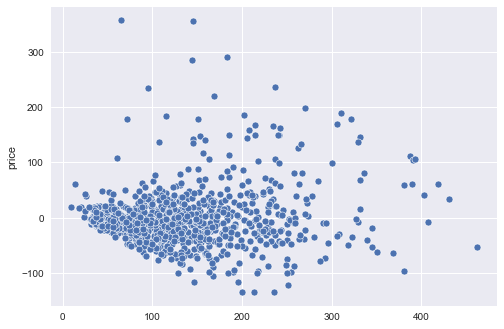

In [177]:
evaluation(xgb_reg, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

# Model Selection

In [178]:
model_tree = DecisionTreeRegressor(max_depth = 3)

linreg = LinearRegression()

model_ada = AdaBoostRegressor(
    model_tree,
    n_estimators = 200,
    learning_rate = 0.1,
    random_state = 10
)

model_rf = RandomForestRegressor(    
    n_estimators = 200,
    max_depth = 3,
    random_state = 42
)

model_gbc = GradientBoostingRegressor(    
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)

model_xgb = XGBRegressor(    
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)

skfold = StratifiedKFold(n_splits=5)
estimator = Pipeline([
                    ('model',xgb_reg)                 
])


hyperparam_space = {
    'model':[model_tree, linreg, model_ada, model_rf, model_gbc, model_xgb]
}

grid_search = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    scoring = 'r2',
    n_jobs = -1
)

In [179]:
grid_search.fit(X_train_preprocessed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     gamma=0, gpu_id=-1,
                                                     importance_type='gain',
                                                     interaction_constraints='',
                                                     learning_rate=0.1,
                                                     max_delta_step=0,
                                                     max_depth=3,
                                                     min_child_weight=1,
                                                     missing=nan,
            

In [180]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.6489778321914308
best param {'model': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             random_state=42, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)}


In [181]:
cv_result_df = pd.DataFrame(grid_search.cv_results_)
cv_result_df['mean_test_score'] = cv_result_df['mean_test_score']*100 
cv_result_df[['param_model','mean_test_score']]

,param_model,mean_test_score
0,DecisionTreeRegressor(max_depth=3),37.556757
1,LinearRegression(),45.566636
2,AdaBoostRegressor(base_estimator=DecisionTreeR...,39.005996
3,"RandomForestRegressor(max_depth=3, n_estimator...",41.077106
4,"GradientBoostingRegressor(n_estimators=200, ra...",64.606686
5,"XGBRegressor(base_score=None, booster=None, co...",64.897783


In [182]:
cv_result_df[['mean_test_score']].to_csv('model.csv')

# Hyperparameter Tuning XGBRegressor

In [183]:
xgb_reg = XGBRegressor(    
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,
    random_state = 42
)

estimator = Pipeline([
                      ('model',xgb_reg)                 
])


param_xgb = [
    {
#             'model__gamma':[0,0.1,0.2,0.3],
            'model__learning_rate':[0.005, 0.05, 0.01, 0.1, 0.3],
            'model__n_estimators':[200, 400, 1000, 2000, 4000],
            'model__max_depth': [2, 3, 4, 5], 
#             'model__subsample': [0.05, 0.3, 0.5]
        }
]

grid_search_xgb = GridSearchCV(
    estimator,
    param_grid = param_xgb,
    cv = skfold,
    scoring = 'r2',
    n_jobs = -1
)

In [184]:
grid_search_xgb.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=0.1,
                                                     max_delta_step=None,
                                                     max_depth=3,
                                                     min

In [185]:
print('best score',grid_search_xgb.best_score_)
print('best param',grid_search_xgb.best_params_)

best score 0.7084639758143114
best param {'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 4000}


# Compare Before & After Hyperparameter Tuning

>#### Before Hyperparameter Tuning

In [186]:
xgb_reg = XGBRegressor(n_estimators = 200,
                      learning_rate = 0.1,
                      max_depth = 3,
                      random_state = 40)

xgb_reg.fit(X_train_preprocessed, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=40,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

R2 test: 0.709249546342204
R2 train: 0.7967099095456136

MSE: 2486.8862935050397
MAE: 31.93724350872718


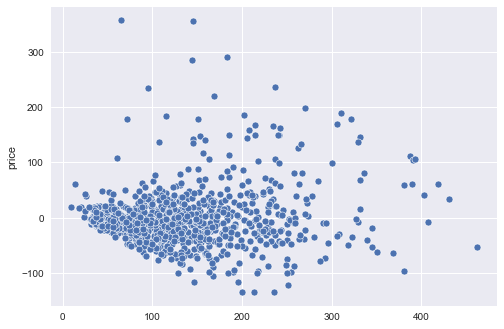

In [187]:
evaluation(xgb_reg, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

>#### After Hyperparamaeter Tuning

In [188]:
grid_search_xgb.best_estimator_.fit(X_train_preprocessed, y_train)

Pipeline(steps=[('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.01,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=4000, n_jobs=4, num_parallel_tree=1,
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [189]:
y_pred = grid_search_xgb.best_estimator_.predict(X_test_preprocessed)
print('R2 :', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R2 : 0.7543342661035057
MAE: 27.442643013867464
MSE: 2101.2615413838976


<AxesSubplot:ylabel='price'>

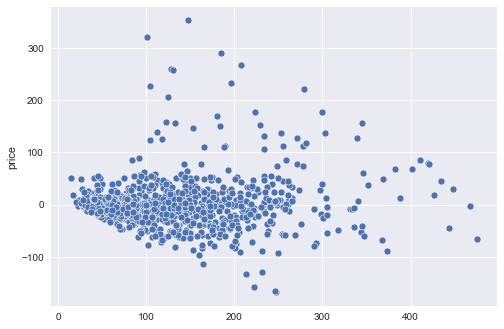

In [190]:
sns.scatterplot(y_pred, y_test - y_pred)

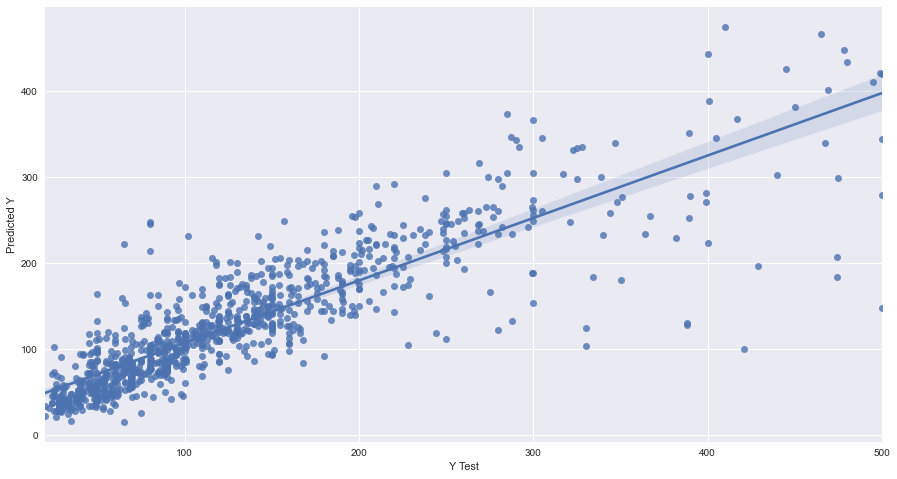

In [191]:
plt.figure(figsize=(15,8))
sns.regplot(y_test, y_pred, fit_reg =True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.savefig('predicted.png')
plt.show()

In [192]:
xgb_df = pd.DataFrame({'Actual':y_test, 'Prediction': y_pred})
xgb_df.head()

,Actual,Prediction
45,50.0,51.989590
2100,108.0,121.726929
719,350.0,180.353638
3503,145.0,154.481201
52,80.0,87.824280


# Final Model Evaluation

In [193]:
best_model = XGBRegressor(learning_rate = 0.01,
                          max_depth = 5,
                          n_estimators = 4000,
                          random_state = 40)

In [194]:
estimator = Pipeline([
                      ('preprocess',transformer),
                      ('clf',best_model)   
])

In [232]:
estimator.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  Pipeline(steps=[('one hot '
                                                                   'encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['neighbourhood_group_cleansed',
                                                   'room_type']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['neighbourhood_cleansed_new',
                                             

In [233]:
df_stay = df[(df['availablity_22_30_indicator'] == 0) | (df['price'] > 500)]
df_stay = df_stay[var+['price']]

df_lower = df[(df['availablity_22_30_indicator'] == 1) & (df['price'] <= 500)]
df_lower = df_lower[var]

> ##### Adjustment

In [234]:
df_lower['minimum_nights'] = np.where(df_lower['minimum_nights'] > 10,
                                           df_lower['minimum_nights'] - 3,
                                           df_lower['minimum_nights']) 

In [235]:
df_lower['availability_30'] = df_lower['availability_30'] - 14
df_lower['availability_30'].value_counts()

15    936
16    828
14    331
13    150
9      90
12     37
11     31
8      23
10     17
Name: availability_30, dtype: int64

> ##### Price Adjustment Result

In [236]:
price_min = df[(df['availablity_22_30_indicator'] == 1) & (df['price'] <= 500)]['price']*0.8
# df_lower['price'] = grid_search_xgb.best_estimator_.predict(air_bnb_lower)
# air_bnb_lower['price'] = np.where(air_bnb_lower['price']<price_min, price_min,air_bnb_lower['price'])

In [237]:
df_lower['price'] = estimator.predict(df_lower)
df_lower['price'] = np.where(df_lower['price'] < price_min, price_min,df_lower['price'])

In [238]:
df_adjustment = df_stay.append(df_lower)
df_adjustment

,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood_cleansed_new,neighbourhood_group_cleansed,latitude,longitude,property_type_new,room_type,bathrooms,shared_bathrooms,bedrooms,beds,accommodates,instant_bookable,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,heating,wifi,ac,hairdryer,refrigerator,smoke,essentials,kitchen,washer,TV,fire_ex,hotwater,hanger,shampoo,pool,price
5,0,Bukit Merah,50.0,1,1,50,1,49,0,Bukit Merah,Central Region,1.288360,103.811440,Apartment,Private room,1.0,0,1.0,0.0,1,0,14,999,0,0,28,303,4.55,4.67,4.25,4.67,4.58,4.58,4.50,0,1,1,1,0,0,1,1,1,1,0,1,0,1,0,40.000000
13,0,Dalston,1.0,1,1,1,0,1,0,Geylang,Central Region,1.313740,103.901900,Townhouse,Private room,1.0,1,1.0,1.0,2,0,90,1125,0,0,6,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,0,1,1,1,1,0,1,0,1,0,65.000000
19,0,Kallang,1.0,1,0,1,0,1,0,Tampines,East Region,1.348160,103.932380,Apartment,Private room,1.0,0,1.0,1.0,2,0,180,730,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,37.000000
20,0,Jurong West,3.0,1,0,4,0,4,0,Jurong West,West Region,1.343010,103.711270,Condominium,Private room,1.0,1,1.0,1.0,1,0,7,365,0,0,13,288,4.63,4.80,4.47,4.97,4.87,4.73,4.70,0,1,1,0,1,0,1,1,1,1,0,0,0,0,1,55.000000
28,1,Marine Parade,5.0,1,1,4,2,2,0,Marine Parade,Central Region,1.304160,103.900760,Apartment,Private room,1.0,0,1.0,1.0,2,0,90,365,0,0,0,0,4.73,4.74,4.75,4.84,4.77,4.74,4.66,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,Tanglin,1.0,1,1,1,1,0,0,Tanglin,Central Region,1.294411,103.829312,Apartment,Entire home/apt,2.0,0,2.0,2.0,3,1,7,1125,14,58,88,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,0,1,0,1,1,1,1,0,0,0,1,177.935196
4208,0,Singapore River,0.0,1,0,1,0,1,0,Singapore River,Central Region,1.287974,103.847683,Condominium,Private room,1.0,1,1.0,1.0,2,1,87,365,16,60,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,54.400000
4210,0,Kallang,8.0,1,1,10,9,1,0,Marine Parade,Central Region,1.304366,103.900947,Other,Entire home/apt,1.0,0,1.0,1.0,2,0,11,1125,16,60,90,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,118.751656
4211,1,Kallang,2.0,1,1,1,1,0,0,Other,North Region,1.351350,103.818822,Condominium,Entire home/apt,1.0,0,2.0,2.0,5,1,1,1125,16,60,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,196.334869


In [239]:
current_omzet_in_30days_new = np.sum(df_adjustment ['price']*(30-df_adjustment ['availability_30']))
print(current_omzet_in_30days_new)

11563137.872497559


In [240]:
max_omzet_in30_days_new = np.sum(df_adjustment['price']*30)
print(max_omzet_in30_days_new)

21337988.045425415


In [241]:
loss_income_new = max_omzet_in30_days_new - current_omzet_in_30days_new
loss_income_new

9774850.172927856

In [242]:
print(current_omzet_in_30days_new*100/max_omzet_in30_days_new)

54.19038499731723


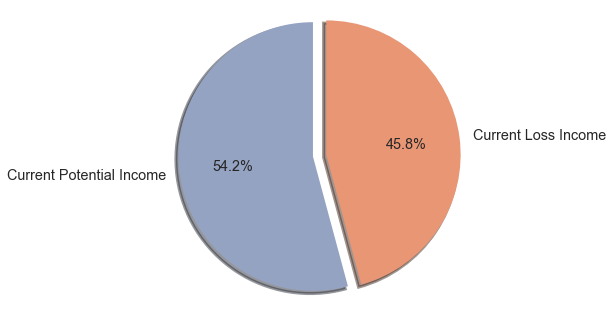

In [243]:
sizes = [current_omzet_in_30days_new, max_omzet_in30_days_new-current_omzet_in_30days_new]
explode = (0, 0.1)
color = ['#95A3C3','#E99675']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=color,
        shadow=True, startangle=90,
        wedgeprops={'linewidth': 3.0},
        textprops={'size': 'x-large'})
ax1.axis('equal')

plt.show()

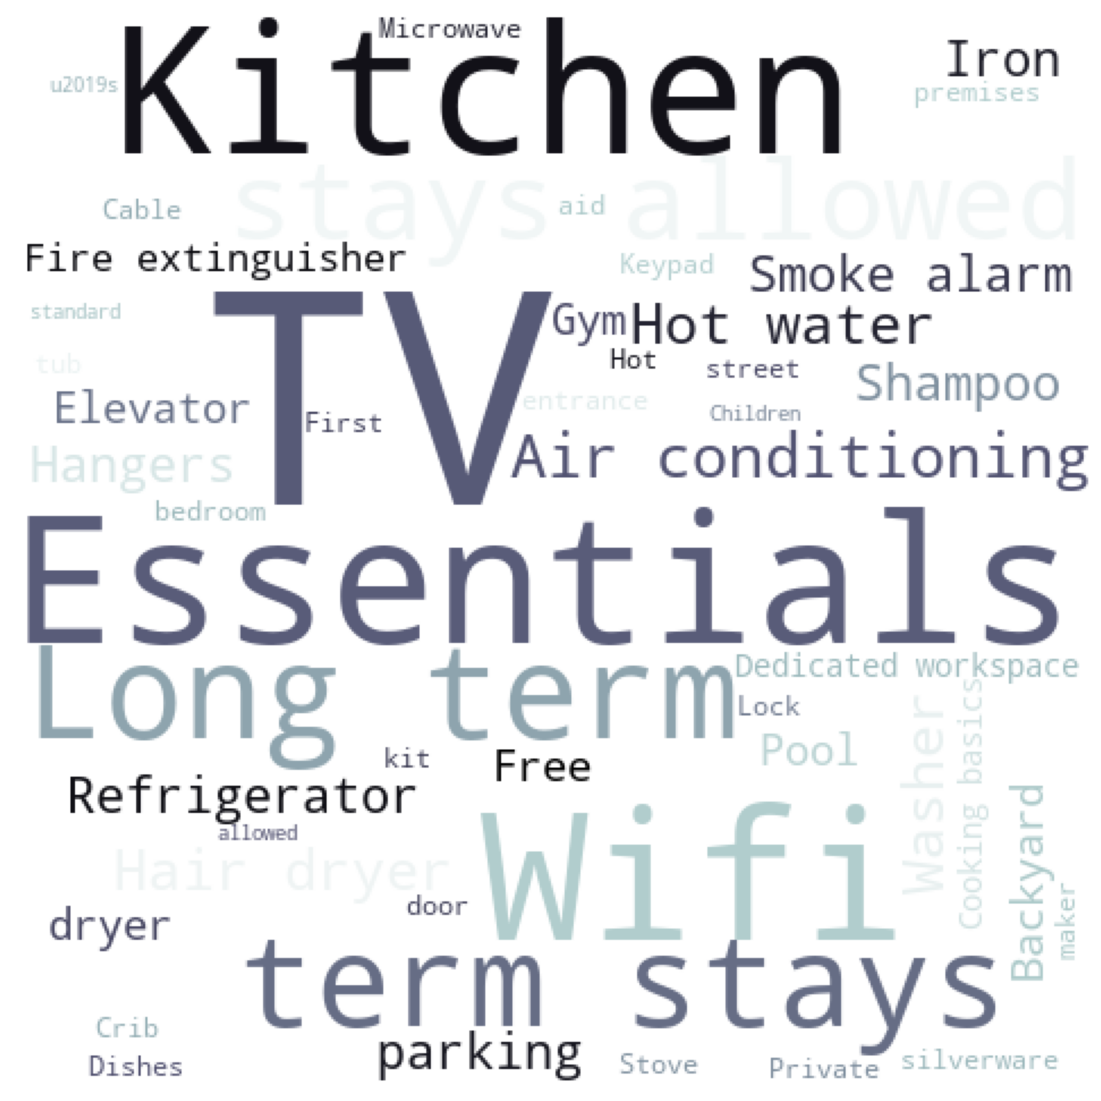

In [231]:
text = df['amenities'].values
word_amenities = WordCloud(width=480, height=480, max_words=50, colormap='bone', background_color='white').generate(str(text))
plt.figure(figsize=(20,20))
plt.imshow(word_amenities)
plt.axis("off")
plt.savefig('Amenities.png')
plt.show()